In [1]:
#Importancia de las librerias
import pandas as pd
import matplotlib
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.cluster import KMeans
from unidecode import unidecode
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import sklearn


LABELS = ['Bajo', 'Alto']

import warnings

warnings.filterwarnings("ignore")

sklearn.__version__

'1.3.2'

In [2]:
#Importamos la data
pd.set_option("display.max.columns", None) # Para mostrar todas las columnas cuando sobrepasan los límites.
df = pd.read_csv("Base_de_datos_casos_de_parto_en_el_municipio_de_Casanare - copia.csv") # Leyendo el archivo.

# 

# EDA Dataset partos casanare

# 

In [3]:
#Este método devuelve las primeras filas del DataFrame
df.head()

,Orden,DEPARTAMENTO DE RESIDENCIA,NOMBRE IPS REPS,MUNICPIO DE RESIDENCIA,TIPO DE ID,EDAD,Ciclo_de_vida,SEXO,NACIONALIDAD,GRUPO POBLACIONAL,ZONA DE UBICACIÓN DE LA VIVIENDA,ESTADO ACTUAL DE USUARIA,DX1,Gestacions,Partos,Cesareas,Abortos,Muertos,Vivos,FECHA DE LA PRUEBA DE EMBARAZO,FECHA DE INGRESO AL CONTROL PRENATAL,FUM,EDAD GESTACIONAL A CORTE,FECHA PROBABLE DE PARTO POR FUR O ECO,EDAD GESTACIONAL AL INGRESO A CPN,TRIMESTRE DE INGRESO A 1 CPN,CAPTACION TEMPRANA,RIESGO OBSTETRICO AL INGRESO DEL CONTROL PRENATAL,Peso Inicial,Talla,Indice de Masa Corporal,Clasificación del IMC,Hipertension arterial,Diabetes,VIH,Sifilis,Tuberculosis,Apoyo familiar,Embarazo deseado,Hábitos de riesgo: FUMAR - SUSTANCIAS PSICOACTIVAS - ALCOHOL,Ha sido víctima de violencia fisica o psicologica,Ha sido víctima de abuso sexual,Información de causales para IVE de acuerdo a la Sentencia C-055-2022,FECHA DE 1 CONTROL PRENATAL,FECHA DE 2 CONTROL PRENATAL,FECHA DE 3 CONTROL PRENATAL,FECHA DE 4 CONTROL PRENATAL,FECHA DE 5 CONTROL PRENATAL,FECHA DE 6 CONTROL PRENATAL,FECHA DE 7 CONTROL PRENATAL,FECHA DE 8 CONTROL PRENATAL,FECHA DE 9 CONTROL PRENATAL,FECHA DE ULTIMO CONTROL,PESO EN EL ULTIMO CONTROL,RIESGO OBSTETRICO ULTIMO CONTROL PRENATAL,SISTOLICA ULTIMO CONTROL,DIASTOLICA ULTIMO CONTROL,FECHA DE CONSULTA POR NUTRICION,FECHA DE 1 CONSULTA DE ODONTOLOGIA,FECHA DE 2 CONSULTA DE ODONTOLOGIA,FECHA DE CONSULTA DE PSICOLOGIA,FECHA DE CONSULTA DE GINECOBSTETRICIA,ECOGRAFIA ENTRE LAS SEMANAS 10 SEMANAS + 6 DIAS Y 13 SEMANAS + 6 DIAS.,FECHA DE ECO DE DETALLE SEMANA 18 Y SEMANA 23 + 6 DIAS,FECHA ECO OBSTETRICA III TRIMESTRE,FECHA DE APLICACIÓN INFLUENZA MAYOR A 14 SEMANAS,FECHA DE APLICACIÓN TdaP ACELULAR MAYOR A 26 SEMANAS,NOMBRE BIOLOGICO CONTRA COVID 19,FECHA 1 DOSIS COVID 19,FECHA 2 DOSIS COVID 19,FECHA 3 DOSIS COVID 19,Fecha toma Hemograma,Resultado Hemograma,Fecha toma Urocultivo,Resultado Urocultivo con antibiograma,Fecha toma ULTIMO Urocultivo,Resultado ÚLTIMO Urocultivo con antibiograma,Fecha Toma 1 VIH,Resultado ELISA para detección de VIH,Fecha toma 1 VDRL,Resultado 1 VDRL,Fecha toma Ig G Rubeola,Resultado Ig G Rubeola,Fecha toma Ig M Rubeola,Resultado Ig M Rubeola,Fecha Ig G Toxoplasma Gondi,Resultado Ig G Toxoplasma Gondi,Fecha Ig M Toxoplasma Gondi,Resultado Ig M Toxoplasma Gondi,FECHA TOMA CHAGAS,RESULTADO CHAGAS,FECHA TOMA TSH,RESULTADO TSH,Fecha Toma Hemoclasificación,Resultado Hemoclasificación,FECHA TOMA GLICEMIA,REPORTE DE GLICEMIA,Fecha Toma Hepatitis B,Resultado Hepatitis B,Fecha toma de Parcial de orina,Resultado del Parcial de orina 1er Trimestre,Fecha toma Frotis vaginal,Reporte de Frotis de flujo vaginal,Fecha Toma prueba tolerancia a la glucosa,Reporte de Prueba de Tolerancia Oral a la glucosa,Fecha 2 toma de VDRL,Resultado VDRL,Fecha de consejería para toma de 2 VIH,Fecha Toma 2 VIH,Resultado prueba VIH,Fecha Toma cultivo Vaginal Para Estreptocoo del grupo B. semana 35 a 37,Resusltado cutlivo vaginal,Fecha Toma 2 Hemograma,Resultado de Hemoglobina del 2 Hemograma,Fecha de consejería para toma de 3 VIH,Fecha Toma 3 VIH,Resultado Prueba VIH,Fecha toma de 3 VDRL,Resultado 3 VDRL,PLAN DE PARTO: VIA DE PARTO : VAGINAL-CESAREA,FECHA DE ASESORIA LACTANCIA MATERNA,Fecha de Parto (dia-mes-año),Caracteristicas del parto VAGINAL-CESAREA,IPS ATENCION PARTO,No Semanas de gestación,SUMINISTRAN MÉTODO DE PLANIFICACION FAMILIAR,TIPO DE METODO,TIPO ID,Sexo,Peso al nacer,Talla,Toman TSH Neonatal,Resultado TSH,Fecha Vacunación con BCG,Fecha Vacunación hepatitis B
0,4359,Casanare,EMPRESA SOCIAL DEL ESTADO SALUD YOPAL,YOPAL,CC,37,Adulto Maduro,FEMENINO,COLOMBIANA,OTRO,URBANA,POS PARTO,Z358 SUPERVISION DE OTROS EMBARAZOS DE ALTO R,0,0,0,0,0,0,No registra,2023-01-25T00:00:00.000,2022-05-11T00:00:00.000,34,2023-02-18T13:40:48.000,34,III,NO,ALTO RIESGO,86,164,31.98,OBESIDAD 1,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,2023-01-25T00:00:00.000,2023-01-25T00:00:00.000,No registra,No registra,No registra,No registra,No registra,No registra,No registra,No registra,2023-01-25T00:00:

In [4]:
#obtener información concisa sobre el DataFrame
df.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4359 entries, 0 to 4358
Data columns (total 135 columns):
 #    Column                                                                   Dtype 
---   ------                                                                   ----- 
 0    Orden                                                                    int64 
 1    DEPARTAMENTO DE RESIDENCIA                                               object
 2    NOMBRE IPS REPS                                                          object
 3    MUNICPIO DE RESIDENCIA                                                   object
 4    TIPO DE ID                                                               object
 5    EDAD                                                                     object
 6    Ciclo_de_vida                                                            object
 7    SEXO                                                                     object
 8    NACIONALIDAD              

In [5]:
# Obtiene una lista de todos los nombres de las columnas
column_names = df.columns.tolist()

# Imprime la lista de nombres de las columnas
print(column_names)

['Orden', 'DEPARTAMENTO DE RESIDENCIA', 'NOMBRE IPS REPS', 'MUNICPIO DE RESIDENCIA', 'TIPO DE ID', 'EDAD', 'Ciclo_de_vida', 'SEXO', 'NACIONALIDAD', 'GRUPO POBLACIONAL', 'ZONA DE UBICACIÓN DE LA VIVIENDA', 'ESTADO ACTUAL DE USUARIA', 'DX1', 'Gestacions', 'Partos', 'Cesareas', 'Abortos', 'Muertos', 'Vivos', 'FECHA DE LA PRUEBA DE EMBARAZO', 'FECHA DE INGRESO AL CONTROL PRENATAL ', 'FUM', 'EDAD GESTACIONAL A CORTE', 'FECHA PROBABLE DE PARTO POR FUR O ECO ', 'EDAD GESTACIONAL AL INGRESO A CPN', 'TRIMESTRE DE INGRESO A 1 CPN', 'CAPTACION TEMPRANA ', 'RIESGO OBSTETRICO AL INGRESO DEL CONTROL PRENATAL', 'Peso Inicial ', 'Talla ', 'Indice de Masa Corporal ', 'Clasificación del IMC', 'Hipertension arterial', 'Diabetes ', 'VIH ', 'Sifilis ', 'Tuberculosis ', 'Apoyo familiar ', 'Embarazo deseado ', 'Hábitos de riesgo: FUMAR - SUSTANCIAS PSICOACTIVAS - ALCOHOL', 'Ha sido víctima de violencia fisica o psicologica', 'Ha sido víctima de abuso sexual', 'Información de causales para IVE de acuerdo a la

In [6]:
#Muestra el numero de filas y el numero de columnas
df.shape

(4359, 135)

In [7]:
#Realizamos una mezcla aleatoria (shuffle) de las filas del DataFrame
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Orden,DEPARTAMENTO DE RESIDENCIA,NOMBRE IPS REPS,MUNICPIO DE RESIDENCIA,TIPO DE ID,EDAD,Ciclo_de_vida,SEXO,NACIONALIDAD,GRUPO POBLACIONAL,ZONA DE UBICACIÓN DE LA VIVIENDA,ESTADO ACTUAL DE USUARIA,DX1,Gestacions,Partos,Cesareas,Abortos,Muertos,Vivos,FECHA DE LA PRUEBA DE EMBARAZO,FECHA DE INGRESO AL CONTROL PRENATAL,FUM,EDAD GESTACIONAL A CORTE,FECHA PROBABLE DE PARTO POR FUR O ECO,EDAD GESTACIONAL AL INGRESO A CPN,TRIMESTRE DE INGRESO A 1 CPN,CAPTACION TEMPRANA,RIESGO OBSTETRICO AL INGRESO DEL CONTROL PRENATAL,Peso Inicial,Talla,Indice de Masa Corporal,Clasificación del IMC,Hipertension arterial,Diabetes,VIH,Sifilis,Tuberculosis,Apoyo familiar,Embarazo deseado,Hábitos de riesgo: FUMAR - SUSTANCIAS PSICOACTIVAS - ALCOHOL,Ha sido víctima de violencia fisica o psicologica,Ha sido víctima de abuso sexual,Información de causales para IVE de acuerdo a la Sentencia C-055-2022,FECHA DE 1 CONTROL PRENATAL,FECHA DE 2 CONTROL PRENATAL,FECHA DE 3 CONTROL PRENATAL,FECHA DE 4 CONTROL PRENATAL,FECHA DE 5 CONTROL PRENATAL,FECHA DE 6 CONTROL PRENATAL,FECHA DE 7 CONTROL PRENATAL,FECHA DE 8 CONTROL PRENATAL,FECHA DE 9 CONTROL PRENATAL,FECHA DE ULTIMO CONTROL,PESO EN EL ULTIMO CONTROL,RIESGO OBSTETRICO ULTIMO CONTROL PRENATAL,SISTOLICA ULTIMO CONTROL,DIASTOLICA ULTIMO CONTROL,FECHA DE CONSULTA POR NUTRICION,FECHA DE 1 CONSULTA DE ODONTOLOGIA,FECHA DE 2 CONSULTA DE ODONTOLOGIA,FECHA DE CONSULTA DE PSICOLOGIA,FECHA DE CONSULTA DE GINECOBSTETRICIA,ECOGRAFIA ENTRE LAS SEMANAS 10 SEMANAS + 6 DIAS Y 13 SEMANAS + 6 DIAS.,FECHA DE ECO DE DETALLE SEMANA 18 Y SEMANA 23 + 6 DIAS,FECHA ECO OBSTETRICA III TRIMESTRE,FECHA DE APLICACIÓN INFLUENZA MAYOR A 14 SEMANAS,FECHA DE APLICACIÓN TdaP ACELULAR MAYOR A 26 SEMANAS,NOMBRE BIOLOGICO CONTRA COVID 19,FECHA 1 DOSIS COVID 19,FECHA 2 DOSIS COVID 19,FECHA 3 DOSIS COVID 19,Fecha toma Hemograma,Resultado Hemograma,Fecha toma Urocultivo,Resultado Urocultivo con antibiograma,Fecha toma ULTIMO Urocultivo,Resultado ÚLTIMO Urocultivo con antibiograma,Fecha Toma 1 VIH,Resultado ELISA para detección de VIH,Fecha toma 1 VDRL,Resultado 1 VDRL,Fecha toma Ig G Rubeola,Resultado Ig G Rubeola,Fecha toma Ig M Rubeola,Resultado Ig M Rubeola,Fecha Ig G Toxoplasma Gondi,Resultado Ig G Toxoplasma Gondi,Fecha Ig M Toxoplasma Gondi,Resultado Ig M Toxoplasma Gondi,FECHA TOMA CHAGAS,RESULTADO CHAGAS,FECHA TOMA TSH,RESULTADO TSH,Fecha Toma Hemoclasificación,Resultado Hemoclasificación,FECHA TOMA GLICEMIA,REPORTE DE GLICEMIA,Fecha Toma Hepatitis B,Resultado Hepatitis B,Fecha toma de Parcial de orina,Resultado del Parcial de orina 1er Trimestre,Fecha toma Frotis vaginal,Reporte de Frotis de flujo vaginal,Fecha Toma prueba tolerancia a la glucosa,Reporte de Prueba de Tolerancia Oral a la glucosa,Fecha 2 toma de VDRL,Resultado VDRL,Fecha de consejería para toma de 2 VIH,Fecha Toma 2 VIH,Resultado prueba VIH,Fecha Toma cultivo Vaginal Para Estreptocoo del grupo B. semana 35 a 37,Resusltado cutlivo vaginal,Fecha Toma 2 Hemograma,Resultado de Hemoglobina del 2 Hemograma,Fecha de consejería para toma de 3 VIH,Fecha Toma 3 VIH,Resultado Prueba VIH,Fecha toma de 3 VDRL,Resultado 3 VDRL,PLAN DE PARTO: VIA DE PARTO : VAGINAL-CESAREA,FECHA DE ASESORIA LACTANCIA MATERNA,Fecha de Parto (dia-mes-año),Caracteristicas del parto VAGINAL-CESAREA,IPS ATENCION PARTO,No Semanas de gestación,SUMINISTRAN MÉTODO DE PLANIFICACION FAMILIAR,TIPO DE METODO,TIPO ID,Sexo,Peso al nacer,Talla,Toman TSH Neonatal,Resultado TSH,Fecha Vacunación con BCG,Fecha Vacunación hepatitis B
0,2542,Casanare,ESE SALUD YOPAL,Sin Datos,CC,20,Adulto Joven,FEMENIINO,Sin Datos,Sin Datos,Sin Datos,PARTO VAGINAL,Z358 SUPERVISION DE OTROS EMBARAZOS DE ALTO R,1,1,0,0,0,1,No registra,2021-05-24T00:00:00.000,44270,No registra,44553.57,10,I,SI,BAJO,58,154,24.46,NORMAL,Sin Datos,Sin Datos,Sin Datos,Sin Datos,Sin Datos,Sin Datos,Sin Datos,Sin Datos,Sin Datos,Sin Datos,Sin Datos,44340,44357,44378,44432,44462,44494,No registra,No registra,No registra,44494,67,BAJO,100,60,44340,44341,No registra,44340,44

In [8]:
# Cuenta la cantidad de veces que aparece cada valor único en la columna 'species' del DataFrame 'creditos renovados por ICETEX'.
df['EDAD'].value_counts()

Sin Datos    651
21           273
20           256
22           228
19           219
24           219
25           216
23           209
27           192
26           188
28           164
18           155
29           150
30           129
17           114
31           114
32           101
34            90
33            88
16            85
37            70
35            66
36            65
39            61
38            51
15            49
40            38
41            37
14            18
42            16
43            14
44             9
45             3
13             2
46             2
95             2
73             1
83             1
104            1
96             1
97             1
121            1
103            1
8              1
94             1
102            1
114            1
68             1
105            1
101            1
84             1
Name: EDAD, dtype: int64

In [9]:
# Cuenta la cantidad de veces que aparece cada valor único en la columna 'species' del DataFrame 'creditos renovados por ICETEX'.
df['ESTADO ACTUAL DE USUARIA'].value_counts()

PARTO                                                                                       1161
POS PARTO                                                                                    829
POSPARTO                                                                                     795
PARTO VAGINAL                                                                                381
ABORTO                                                                                       243
CESAREA                                                                                      197
POSTPARTO                                                                                     92
GESTANTE                                                                                      79
POSTABORTO                                                                                    79
PARTO X FPP                                                                                   66
Z321 EMBARAZO CONFIRMADO      

In [10]:
# Cuenta la cantidad de veces que aparece cada valor único en la columna 'species' del DataFrame 'creditos renovados por ICETEX'.
df['Gestacions'].value_counts()

1            1924
Sin Datos     927
2             696
3             375
0             223
4             130
5              40
6              26
7              11
8               4
9               2
11              1
Name: Gestacions, dtype: int64

In [11]:
# Cuenta la cantidad de veces que aparece cada valor único en la columna 'species' del DataFrame 'creditos renovados por ICETEX'.
df['Clasificación del IMC'].value_counts()

Sin Datos                  1650
NORMAL                      830
SOBREPESO                   814
ADECUADO                    268
OBESIDAD 1                  261
NO                          165
OBESIDAD                    115
OBESIDAD 2                   85
BAJO PESO                    42
OBESIDAD 3                   36
Sin Información              31
DNT                          24
BAJO                         23
ERROR: #REF!                  2
1900-02-01T11:16:48.000       1
ERROR: #DIV/0!                1
ERROR: #VALUE!                1
1900-01-31T22:19:12.000       1
1900-01-23T02:38:24.000       1
1900-01-22T19:55:12.000       1
24.34                         1
1900-01-24T02:52:48.000       1
35.93                         1
1900-02-03T00:00:00.000       1
1900-01-23T13:26:24.000       1
1900-01-22T06:14:24.000       1
1900-02-01T10:48:00.000       1
Name: Clasificación del IMC, dtype: int64

In [12]:
# Cuenta la cantidad de veces que aparece cada valor único en la columna 'species' del DataFrame 'creditos renovados por ICETEX'.
df['Hipertension arterial'].value_counts()

Sin Datos     3037
NO            1299
N0              11
NORMAL           6
OBESIDAD 1       4
OBESIDAD 2       1
SI               1
Name: Hipertension arterial, dtype: int64

In [13]:
# Cuenta la cantidad de veces que aparece cada valor único en la columna 'species' del DataFrame 'creditos renovados por ICETEX'.
df['Resultado 3 VDRL'].value_counts()

No registra                        3421
Negativo                            546
NEGATIVO                            310
NO REACTIVO                          17
No Reactiva                          15
ERROR: #REF!                          8
0                                     8
POSITIVO                              7
REACTIVA8DILS                         3
Reactiva (   1 Dils )                 3
REACTIVO                              2
Resultado: NO REACTIVO                2
44580                                 1
44553                                 1
Positivo                              1
REACTIVA4DILS                         1
44573                                 1
Reactiva (   4 Dils )                 1
Reactiva (  16 Dils )                 1
NOREACTIVOPARAANTICUERPOSHIV1Y2       1
negativo                              1
REACTIVO32DILS                        1
Reactiva(4Dils)                       1
NOREACTIVO                            1
REACTIVA1DILS                         1


# Creamos un gráfico de barras que muestra la distribución de los valores únicos en una columna específica del DataFrame utilizando la biblioteca seaborn

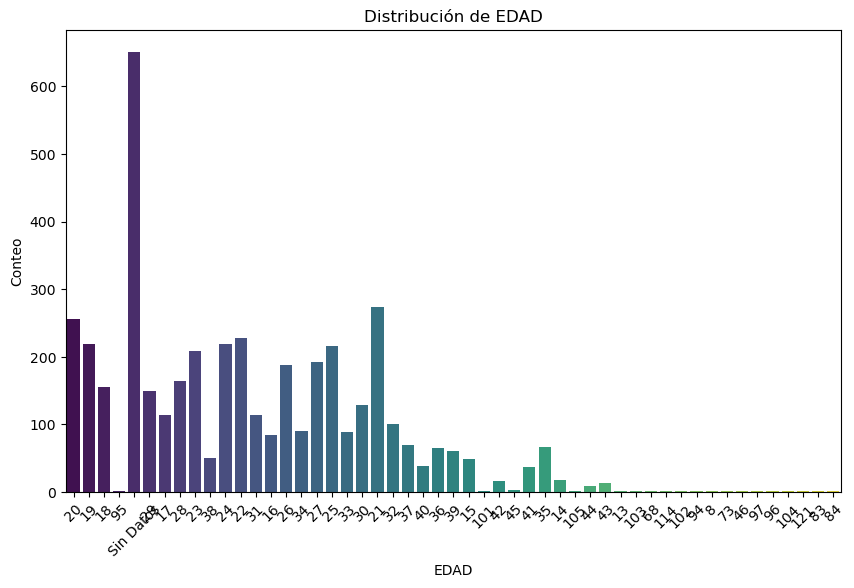

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns  # Para mejorar el estilo de la gráfica

# Supongamos que deseas visualizar la cuenta de valores únicos en la columna 'species'
# Puedes cambiar 'species' al nombre de la columna que te interese.
columna_interes = 'EDAD'

# Visualizar la cuenta de valores únicos en la columna seleccionada
plt.figure(figsize=(10, 6))
sns.countplot(x=columna_interes, data=df, palette='viridis')
plt.title(f'Distribución de {columna_interes}')
plt.xlabel(columna_interes)
plt.ylabel('Conteo')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visibilidad
plt.show()

# Visualizamos los valores nulos (NaN) en un DataFrame utilizando un mapa de calor (heatmap)

<Axes: >

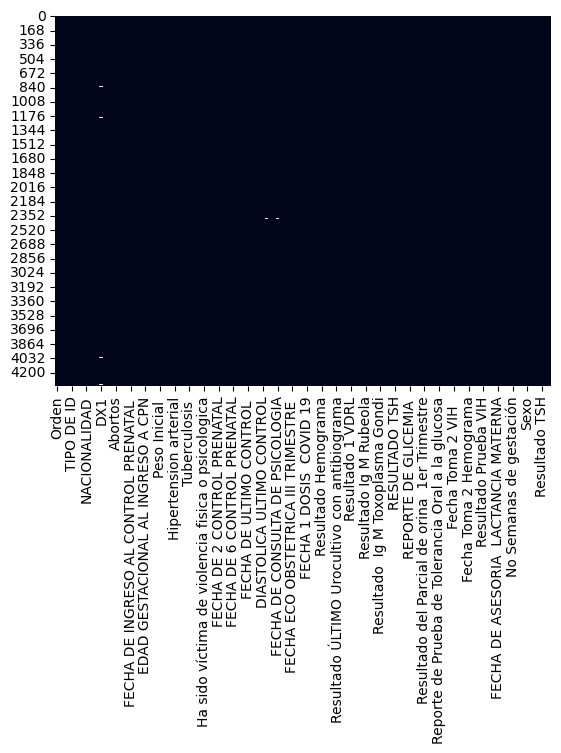

In [15]:
#visualizar los valores nulos (NaN) en un DataFrame utilizando un mapa de calor (heatmap)
import seaborn as sns
sns.heatmap(df.isnull(),cbar=False)

In [16]:
#Para mostrar la cantidad de valores faltantes para todas las columnas
missing_values = df.isna().sum()
print(missing_values[missing_values > 0])

DX1                                34
Muertos                             4
Vivos                               2
FUM                                 1
FECHA DE CONSULTA POR NUTRICION     4
FECHA DE CONSULTA DE PSICOLOGIA     4
dtype: int64


# 

Recuento (count): Número de elementos no nulos en cada columna.

Media (mean): Media aritmética de los valores en cada columna.

Desviación estándar (std): Desviación estándar, que mide la dispersión de los valores alrededor de la media.

Valor mínimo (min): Valor mínimo en cada columna.

Cuartiles (25%, 50%, 75%): Valores que dividen los datos en cuartiles. El 50% es la mediana.

Valor máximo (max): Valor máximo en cada columna.

In [17]:
#Genera un resumen estadístico de las columnas numéricas del DataFrame.
df.describe()

,Orden
count,4359.000000
mean,2180.000000
std,1258.479241
min,1.000000
25%,1090.500000
50%,2180.000000
75%,3269.500000
max,4359.000000


# 

# Preprocesamiento de los datos

# 

In [18]:
#Realizamos una copia del dataset para realizar el preprocesamineto de los datos.
cp_df = df.copy()

In [19]:
#Convertimos todos los valores de texto en mayusculas
cp_df = cp_df.applymap(lambda x: x.upper() if isinstance(x, str) else x)

In [20]:
#Ponemos todos los nombres de columnas en mayuscula
cp_df.columns = cp_df.columns.str.upper()

In [21]:
#Remplazamos los espacios de los nombres de las columnas con un "_"
cp_df.columns = cp_df.columns.str.replace(' ', '_')

In [22]:
#Eliminamos todos las tildes(acentos) de los nombres de las columnas
cp_df.columns = [unidecode(col) for col in cp_df.columns]

# Eliminacion de datos incoherentes en las columnas

In [23]:
# Cuenta la cantidad de veces que aparece cada valor único en la columna 'species' del DataFrame 'creditos renovados por ICETEX'.
cp_df['DEPARTAMENTO_DE_RESIDENCIA'].value_counts()

CASANARE           4235
ORINOQUIA           118
SACADAS DE BASE       4
ABORTO                2
Name: DEPARTAMENTO_DE_RESIDENCIA, dtype: int64

In [24]:
# Lista de valores a eliminar
valores_a_eliminar = ['ABORTO', 'SACADAS DE BASE']

# Elimina las filas donde 'DEPARTAMENTO_DE_RESIDENCIA' coincida con los valores de la lista
cp_df.drop(cp_df[cp_df['DEPARTAMENTO_DE_RESIDENCIA'].isin(valores_a_eliminar)].index, inplace=True)

In [25]:
#Cambiamos los datos 'SIN DATOS', 'F', 'M' con COLOMBIANA
cp_df['HABITOS_DE_RIESGO:_FUMAR_-_SUSTANCIAS_PSICOACTIVAS_-_ALCOHOL'].replace(['SIN DATOS', 'SIN DATO'], 'NO', inplace=True)

In [26]:
# Lista de valores a eliminar
valores_a_eliminar = ['SIN DATOS']

# Elimina las filas donde 'DEPARTAMENTO_DE_RESIDENCIA' coincida con los valores de la lista
cp_df.drop(cp_df[cp_df['EDAD'].isin(valores_a_eliminar)].index, inplace=True)

In [27]:
# Lista de valores a eliminar
valores_a_eliminar = ['SIN DATOS']

# Elimina las filas donde 'DEPARTAMENTO_DE_RESIDENCIA' coincida con los valores de la lista
cp_df.drop(cp_df[cp_df['DIABETES_'].isin(valores_a_eliminar)].index, inplace=True)

In [28]:
# Lista de valores a eliminar
valores_a_eliminar = ['SIN DATOS']

# Elimina las filas donde 'DEPARTAMENTO_DE_RESIDENCIA' coincida con los valores de la lista
cp_df.drop(cp_df[cp_df['VIH_'].isin(valores_a_eliminar)].index, inplace=True)

In [29]:
# Lista de valores a eliminar
valores_a_eliminar = ['SIN DATOS']

# Elimina las filas donde 'DEPARTAMENTO_DE_RESIDENCIA' coincida con los valores de la lista
cp_df.drop(cp_df[cp_df['SIFILIS_'].isin(valores_a_eliminar)].index, inplace=True)

In [30]:
# Lista de valores a eliminar
valores_a_eliminar = ['SIN DATO']

# Elimina las filas donde 'DEPARTAMENTO_DE_RESIDENCIA' coincida con los valores de la lista
cp_df.drop(cp_df[cp_df['HABITOS_DE_RIESGO:_FUMAR_-_SUSTANCIAS_PSICOACTIVAS_-_ALCOHOL'].isin(valores_a_eliminar)].index, inplace=True)

In [31]:
#Cambiamos los datos 'SIN DATOS', 'F', 'M' con COLOMBIANA
cp_df['RIESGO_OBSTETRICO_ULTIMO_CONTROL_PRENATAL'].replace(['ALTO RIESGO'], 'ALTO', inplace=True)

In [32]:
#Cambiamos los datos 'SIN DATOS', 'F', 'M' con COLOMBIANA
cp_df['RIESGO_OBSTETRICO_ULTIMO_CONTROL_PRENATAL'].replace(['BAJO RIESGO'], 'BAJO', inplace=True)

In [33]:
# Lista de valores a eliminar
valores_a_eliminar = ['120', '115','111','100','ALTO??']

# Elimina las filas donde 'DEPARTAMENTO_DE_RESIDENCIA' coincida con los valores de la lista
cp_df.drop(cp_df[cp_df['RIESGO_OBSTETRICO_ULTIMO_CONTROL_PRENATAL'].isin(valores_a_eliminar)].index, inplace=True)

In [34]:
cp_df['REPORTE_DE_GLICEMIA_'] = cp_df['REPORTE_DE_GLICEMIA_'].str.replace('MG-DL', '')

In [35]:
# Utiliza el método str.replace() para eliminar "MG/DL" de la columna
cp_df['REPORTE_DE_GLICEMIA_'] = cp_df['REPORTE_DE_GLICEMIA_'].str.replace('MG/DL', '')

In [36]:
# Lista de valores a eliminar
valores_a_eliminar = ['GLICEMIAPRE:62']

# Elimina las filas donde 'DEPARTAMENTO_DE_RESIDENCIA' coincida con los valores de la lista
cp_df.drop(cp_df[cp_df['REPORTE_DE_GLICEMIA_'].isin(valores_a_eliminar)].index, inplace=True)


In [37]:
# Utiliza el método str.replace() para eliminar "MG/DL" de la columna
cp_df['REPORTE_DE_GLICEMIA_'] = cp_df['REPORTE_DE_GLICEMIA_'].str.replace('MG/DL', '')

In [38]:
#Cambiamos los datos 'SIN DATOS', 'F', 'M' con COLOMBIANA
cp_df['REPORTE_DE_GLICEMIA_'].replace(['GLICEMIAPRE:62'], '62', inplace=True)

In [39]:
#Cambiamos los datos 'SIN DATOS', 'F', 'M' con COLOMBIANA
cp_df['REPORTE_DE_GLICEMIA_'].replace(['GLICEMIA AYUNAS: 75'], '75', inplace=True)

In [40]:
# Lista de valores a eliminar
valores_a_eliminar = ['1900-03-26T00:00:00.000']

# Elimina las filas donde 'DEPARTAMENTO_DE_RESIDENCIA' coincida con los valores de la lista
cp_df.drop(cp_df[cp_df['REPORTE_DE_GLICEMIA_'].isin(valores_a_eliminar)].index, inplace=True)

In [41]:
#Cambiamos los datos 'SIN DATOS', 'F', 'M' con COLOMBIANA
cp_df['REPORTE_DE_GLICEMIA_'].replace(['GLICEMIAPRE:70'], '70', inplace=True)

In [42]:
# Lista de valores a eliminar
valores_a_eliminar = ['1900-03-14T00:00:00.000']

# Elimina las filas donde 'DEPARTAMENTO_DE_RESIDENCIA' coincida con los valores de la lista
cp_df.drop(cp_df[cp_df['REPORTE_DE_GLICEMIA_'].isin(valores_a_eliminar)].index, inplace=True)

In [43]:
# Lista de valores a eliminar
valores_a_eliminar = ['1900-03-28T00:00:00.000']

# Elimina las filas donde 'DEPARTAMENTO_DE_RESIDENCIA' coincida con los valores de la lista
cp_df.drop(cp_df[cp_df['REPORTE_DE_GLICEMIA_'].isin(valores_a_eliminar)].index, inplace=True)

In [44]:
# Lista de valores a eliminar
valores_a_eliminar = ['1900-03-16T00:00:00.000']

# Elimina las filas donde 'DEPARTAMENTO_DE_RESIDENCIA' coincida con los valores de la lista
cp_df.drop(cp_df[cp_df['REPORTE_DE_GLICEMIA_'].isin(valores_a_eliminar)].index, inplace=True)

In [45]:
# Lista de valores a eliminar
valores_a_eliminar = ['1900-03-16T00:00:00.000']

# Elimina las filas donde 'DEPARTAMENTO_DE_RESIDENCIA' coincida con los valores de la lista
cp_df.drop(cp_df[cp_df['REPORTE_DE_GLICEMIA_'].isin(valores_a_eliminar)].index, inplace=True)

In [46]:
#Cambiamos los datos 'SIN DATOS', 'F', 'M' con COLOMBIANA
cp_df['REPORTE_DE_GLICEMIA_'].replace(['80  PRUEBA RAPIDA TREPONEMICA'], '80', inplace=True)

In [47]:
# Lista de valores a eliminar
valores_a_eliminar = ['1900-03-27T00:00:00.000']

# Elimina las filas donde 'DEPARTAMENTO_DE_RESIDENCIA' coincida con los valores de la lista
cp_df.drop(cp_df[cp_df['REPORTE_DE_GLICEMIA_'].isin(valores_a_eliminar)].index, inplace=True)

In [48]:
#Cambiamos los datos 'SIN DATOS', 'F', 'M' con COLOMBIANA
cp_df['REPORTE_DE_GLICEMIA_'].replace(['80PRUEBARAPIDATREPONEMICA'], '80', inplace=True)

In [49]:
# Lista de valores a eliminar
valores_a_eliminar = ['1900-03-23T00:00:00.000']

# Elimina las filas donde 'DEPARTAMENTO_DE_RESIDENCIA' coincida con los valores de la lista
cp_df.drop(cp_df[cp_df['REPORTE_DE_GLICEMIA_'].isin(valores_a_eliminar)].index, inplace=True)

In [50]:
# Lista de valores a eliminar
valores_a_eliminar = ['2021-12-05T00:00:00.000']

# Elimina las filas donde 'DEPARTAMENTO_DE_RESIDENCIA' coincida con los valores de la lista
cp_df.drop(cp_df[cp_df['REPORTE_DE_GLICEMIA_'].isin(valores_a_eliminar)].index, inplace=True)

In [51]:
# Lista de valores a eliminar
valores_a_eliminar = ['2021-12-06T00:00:00.000']

# Elimina las filas donde 'DEPARTAMENTO_DE_RESIDENCIA' coincida con los valores de la lista
cp_df.drop(cp_df[cp_df['REPORTE_DE_GLICEMIA_'].isin(valores_a_eliminar)].index, inplace=True)

In [52]:
# Lista de valores a eliminar
valores_a_eliminar = ['2021-12-23T00:00:00.000']

# Elimina las filas donde 'DEPARTAMENTO_DE_RESIDENCIA' coincida con los valores de la lista
cp_df.drop(cp_df[cp_df['REPORTE_DE_GLICEMIA_'].isin(valores_a_eliminar)].index, inplace=True)

In [53]:
# Lista de valores a eliminar
valores_a_eliminar = ['2021-12-02T00:00:00.000']

# Elimina las filas donde 'DEPARTAMENTO_DE_RESIDENCIA' coincida con los valores de la lista
cp_df.drop(cp_df[cp_df['REPORTE_DE_GLICEMIA_'].isin(valores_a_eliminar)].index, inplace=True)

In [54]:
# Lista de valores a eliminar
valores_a_eliminar = ['2021-12-09T00:00:00.000']

# Elimina las filas donde 'DEPARTAMENTO_DE_RESIDENCIA' coincida con los valores de la lista
cp_df.drop(cp_df[cp_df['REPORTE_DE_GLICEMIA_'].isin(valores_a_eliminar)].index, inplace=True)

In [55]:
# Lista de valores a eliminar
valores_a_eliminar = ['NO REGISTRA']

# Elimina las filas donde 'DEPARTAMENTO_DE_RESIDENCIA' coincida con los valores de la lista
cp_df.drop(cp_df[cp_df['REPORTE_DE_GLICEMIA_'].isin(valores_a_eliminar)].index, inplace=True)

In [56]:
# Lista de valores a eliminar
valores_a_eliminar = ['1900-03-11T00:00:00.000']

# Elimina las filas donde 'DEPARTAMENTO_DE_RESIDENCIA' coincida con los valores de la lista
cp_df.drop(cp_df[cp_df['REPORTE_DE_GLICEMIA_'].isin(valores_a_eliminar)].index, inplace=True)

In [57]:
# Lista de valores a eliminar
valores_a_eliminar = ['2021-12-08T00:00:00.000']

# Elimina las filas donde 'DEPARTAMENTO_DE_RESIDENCIA' coincida con los valores de la lista
cp_df.drop(cp_df[cp_df['REPORTE_DE_GLICEMIA_'].isin(valores_a_eliminar)].index, inplace=True)

In [58]:
#Cambiamos los datos 'SIN DATOS', 'F', 'M' con COLOMBIANA
cp_df['ESTADO_ACTUAL_DE_USUARIA'].replace(['POS PARTO'], 'POSPARTO', inplace=True)

In [59]:
#Cambiamos los datos 'SIN DATOS', 'F', 'M' con COLOMBIANA
cp_df['ESTADO_ACTUAL_DE_USUARIA'].replace(['Z321EMBARAZOCONFIRMADO', 'Z348SUPERVISIONDEOTROSEMBARAZOSNORMALES', 'Z321 EMBARAZO CONFIRMADO','Z349SUPERVISIONDEEMBARAZONORMALNOESPECI'], 'GESTANTE', inplace=True)

In [60]:
#Cambiamos los datos 'SIN DATOS', 'F', 'M' con COLOMBIANA
cp_df['ESTADO_ACTUAL_DE_USUARIA'].replace(['PARTO POR FUR'], 'PARTO', inplace=True)

In [61]:
#Cambiamos los datos 'SIN DATOS', 'F', 'M' con COLOMBIANA
cp_df['ESTADO_ACTUAL_DE_USUARIA'].replace(['MUERTE PERINATAL', 'MORTALIDADPERINATAL'], 'ABORTO', inplace=True)

In [62]:
#Cambiamos los datos 'SIN DATOS', 'F', 'M' con COLOMBIANA
cp_df['ESTADO_ACTUAL_DE_USUARIA'].replace(['Z359SUPERVISIONDEEMBARAZODEALTORIESGO'], 'GESTANTE', inplace=True)

In [63]:
#Cambiamos los datos 'SIN DATOS', 'F', 'M' con COLOMBIANA
cp_df['ESTADO_ACTUAL_DE_USUARIA'].replace(['Z359 SUPERVISION DE EMBARAZO DE ALTO RIESGO'], 'GESTANTE', inplace=True)

In [64]:
# Lista de valores a eliminar
valores_a_eliminar = ['Z32110-1', 'LEGRADO OBSTETRICO','LEGRADO']

# Elimina las filas donde 'DEPARTAMENTO_DE_RESIDENCIA' coincida con los valores de la lista
cp_df.drop(cp_df[cp_df['ESTADO_ACTUAL_DE_USUARIA'].isin(valores_a_eliminar)].index, inplace=True)

In [65]:
#Cambiamos los datos 'SIN DATOS', 'F', 'M' con COLOMBIANA
cp_df['HIPERTENSION_ARTERIAL'].replace(['N0'], 'NO', inplace=True)

In [66]:
# Lista de valores a eliminar
valores_a_eliminar = ['SIN DATOS']

# Elimina las filas donde 'DEPARTAMENTO_DE_RESIDENCIA' coincida con los valores de la lista
cp_df.drop(cp_df[cp_df['PARTOS'].isin(valores_a_eliminar)].index, inplace=True)

In [67]:
# Lista de valores a eliminar
valores_a_eliminar = ['SIN DATOS']

# Elimina las filas donde 'DEPARTAMENTO_DE_RESIDENCIA' coincida con los valores de la lista
cp_df.drop(cp_df[cp_df['VIVOS'].isin(valores_a_eliminar)].index, inplace=True)

In [68]:
#Cambiamos los datos 'SIN DATOS', 'F', 'M' con COLOMBIANA
cp_df['CLASIFICACION_DEL_IMC'].replace(['BAJO PESO'], 'BAJO', inplace=True)

In [69]:
#Cambiamos los datos 'SIN DATOS', 'F', 'M' con COLOMBIANA
cp_df['CLASIFICACION_DEL_IMC'].replace(['NO','ERROR: #REF!','SIN INFORMACIÓN','DNT','ERROR: #DIV/0!'], 'SIN DATOS', inplace=True)

In [70]:
# Lista de valores a eliminar
valores_a_eliminar = ['SIN DATOS']

# Elimina las filas donde 'DEPARTAMENTO_DE_RESIDENCIA' coincida con los valores de la lista
cp_df.drop(cp_df[cp_df['CLASIFICACION_DEL_IMC'].isin(valores_a_eliminar)].index, inplace=True)

In [71]:
# Lista de valores a eliminar
valores_a_eliminar = ['SIN DATOS']

# Elimina las filas donde 'DEPARTAMENTO_DE_RESIDENCIA' coincida con los valores de la lista
cp_df.drop(cp_df[cp_df['RIESGO_OBSTETRICO_ULTIMO_CONTROL_PRENATAL'].isin(valores_a_eliminar)].index, inplace=True)

In [72]:
#Cambiamos los datos 'SIN DATOS', 'F', 'M' con COLOMBIANA
cp_df['RESULTADO_VDRL'].replace(['NO REACTIVO','NOREACTIVO','NOREACTIVOPARAANTICUERPOSHIV1Y2','NO REACTIVA','RESULTADO:NOREACTIVO','NOREACTIVOPARAANTICUERPOSVIH1YVIH2','REACTIVO8DILS','NOREACTIVA','RESULTADO: NO REACTIVO','NO REGISTRA'], 'NEGATIVO', inplace=True)

In [73]:
# Lista de valores a eliminar
valores_a_eliminar = ['0']

# Elimina las filas donde 'DEPARTAMENTO_DE_RESIDENCIA' coincida con los valores de la lista
cp_df.drop(cp_df[cp_df['RESULTADO_VDRL'].isin(valores_a_eliminar)].index, inplace=True)

In [74]:
# Lista de valores a eliminar
valores_a_eliminar = ['SIN DATOS']

# Elimina las filas donde 'DEPARTAMENTO_DE_RESIDENCIA' coincida con los valores de la lista
cp_df.drop(cp_df[cp_df['GESTACIONS'].isin(valores_a_eliminar)].index, inplace=True)

In [75]:
# Lista de valores a eliminar
valores_a_eliminar = ['2021-12-08T00:00:00.000']

# Elimina las filas donde 'DEPARTAMENTO_DE_RESIDENCIA' coincida con los valores de la lista
cp_df.drop(cp_df[cp_df['REPORTE_DE_GLICEMIA_'].isin(valores_a_eliminar)].index, inplace=True)

In [76]:
#Cambiamos los datos 'SIN DATOS', 'F', 'M' con COLOMBIANA
cp_df['REPORTE_DE_GLICEMIA_'].replace(['97.64'], '97', inplace=True)

In [77]:
# Utiliza el método str.replace() para eliminar "MG/DL" de la columna
cp_df['REPORTE_DE_GLICEMIA_'] = cp_df['REPORTE_DE_GLICEMIA_'].str.replace('MG/DL', '')

In [78]:
# Lista de valores a eliminar
valores_a_eliminar = ['NO REGISTRA']

# Elimina las filas donde 'DEPARTAMENTO_DE_RESIDENCIA' coincida con los valores de la lista
cp_df.drop(cp_df[cp_df['REPORTE_DE_GLICEMIA_'].isin(valores_a_eliminar)].index, inplace=True)

In [79]:
#Cambiamos los datos 'SIN DATOS', 'F', 'M' con COLOMBIANA
cp_df['REPORTE_DE_GLICEMIA_'].replace(['80PRUEBARAPIDATREPONEMICA'], '80', inplace=True)

In [80]:
cp_df['REPORTE_DE_GLICEMIA_'] = cp_df['REPORTE_DE_GLICEMIA_'].str.replace('MG-DL', '')

In [81]:
# Lista de valores a eliminar
valores_a_eliminar = ['1900-03-23T00:00:00.000']

# Elimina las filas donde 'DEPARTAMENTO_DE_RESIDENCIA' coincida con los valores de la lista
cp_df.drop(cp_df[cp_df['REPORTE_DE_GLICEMIA_'].isin(valores_a_eliminar)].index, inplace=True)

# 

# Creacion de la columna "ETIQUETA_DIABETES"
La función etiquetar_diabetes toma un valor de glicemia (como una cadena glicemia_str), lo convierte a un número de punto flotante y asigna una etiqueta según los siguientes criterios:

Si la glicemia es menor que 100, se etiqueta como "Normal".

Si la glicemia está entre 100 y 125 (inclusive), se etiqueta como "Prediabetes".

Si la glicemia es mayor que 125, se etiqueta como "Diabetes".

# 

In [82]:
#Creamos una etiqueta de diabetes en la cuac
def etiquetar_diabetes(glicemia_str):
    glicemia = float(glicemia_str)  # Convierte el valor a un número de punto flotante
    if glicemia < 100:
        return "Normal"
    elif 100 <= glicemia <= 125:
        return "Prediabetes"
    else:
        return "Diabetes"

# Aplicar la función de etiquetado a la columna 'REPORTE_DE_GLICEMIA_' y crear una nueva columna 'ETIQUETA_DIABETES'
cp_df['ETIQUETA_DIABETES'] = cp_df['REPORTE_DE_GLICEMIA_'].apply(etiquetar_diabetes)

# Imprimir el DataFrame con las etiquetas
print(cp_df)

      ORDEN DEPARTAMENTO_DE_RESIDENCIA                        NOMBRE_IPS_REPS  \
18     3672                   CASANARE                        ESE SALUD YOPAL   
40     3389                   CASANARE      E.S.E HOSPITAL LOCAL DE TAURAMENA   
49     2723                   CASANARE  EMPRESA SOCIAL DEL ESTADO SALUD YOPAL   
61     3701                   CASANARE                        ESE SALUD YOPAL   
62     3498                   CASANARE                        ESE SALUD YOPAL   
...     ...                        ...                                    ...   
4322   2877                   CASANARE  EMPRESA SOCIAL DEL ESTADO SALUD YOPAL   
4328   2575                   CASANARE                        ESE SALUD YOPAL   
4331   3764                   CASANARE                        ESE SALUD YOPAL   
4345   4077                   CASANARE                        ESE SALUD YOPAL   
4358   4273                   CASANARE  EMPRESA SOCIAL DEL ESTADO SALUD YOPAL   

     MUNICPIO_DE_RESIDENCIA

# 

# Seleccion de las columnas relevantes

# 

In [83]:
# Selecciona las columnas específicas

columnas_seleccionadas = ['EDAD', 'ESTADO_ACTUAL_DE_USUARIA','GESTACIONS', 
                          'HIPERTENSION_ARTERIAL','PARTOS','CESAREAS','ABORTOS',
                          'MUERTOS','VIVOS','DIABETES_','VIH_','SIFILIS_','TUBERCULOSIS_',
                         'RIESGO_OBSTETRICO_ULTIMO_CONTROL_PRENATAL'
                         ,'RESULTADO_VDRL', 'HABITOS_DE_RIESGO:_FUMAR_-_SUSTANCIAS_PSICOACTIVAS_-_ALCOHOL','ETIQUETA_DIABETES']

                    
datos_filtrados = cp_df[columnas_seleccionadas]

# Guarda los datos filtrados en un nuevo archivo CSV
datos_filtrados.to_csv('datos_filtrados.csv', index=False)

In [84]:
ds = pd.read_csv("datos_filtradós.csv") # Leyendo el archivo.v

# 

# Mapeo de las columnas relevantes

# 

In [85]:
mapeo_clasificacion_diabetes = {
    'Normal': 0,
    'Prediabetes': 1,
    'Diabetes': 2

}

# Aplica el mapeo a la columna "CLASIFICACION_DEL_IMC"
ds['ETIQUETA_DIABETES'] = ds['ETIQUETA_DIABETES'].map(mapeo_clasificacion_diabetes)

In [86]:
# Crear un diccionario que mapee los valores únicos a números
mapeo = {
    'PARTO': 0,
    'POSPARTO': 1,
    'GESTANTE': 2,
    'ABORTO': 3,
    'CESAREA': 4,
    'PARTO VAGINAL': 5,
}

# Suponiendo que tienes un DataFrame llamado 'df' con la columna 'TIPO'
ds['ESTADO_ACTUAL_DE_USUARIA'] = ds['ESTADO_ACTUAL_DE_USUARIA'].map(mapeo)


In [87]:
mapeo = {'NEGATIVO': 0, 'POSITIVO': 1}

# Aplica el mapeo a la columna 'RESULTADO':
ds['RESULTADO_VDRL'] = ds['RESULTADO_VDRL'].map(mapeo)

In [88]:
mapeo = {'NO': 0, 'SI': 1}

# Aplica el mapeo a la columna 'RESULTADO':
ds['HIPERTENSION_ARTERIAL'] = ds['HIPERTENSION_ARTERIAL'].map(mapeo)

In [89]:
mapeo = {'NO': 0, 'SI': 1}

# Aplica el mapeo a la columna 'RESULTADO':
ds['VIH_'] = ds['VIH_'].map(mapeo)

In [90]:
mapeo = {'NO': 0, 'SI': 1}

# Aplica el mapeo a la columna 'RESULTADO':
ds['TUBERCULOSIS_'] = ds['TUBERCULOSIS_'].map(mapeo)

In [91]:
mapeo = {'BAJO': 0, 'ALTO': 1}

# Aplica el mapeo a la columna 'RESULTADO':
ds['RIESGO_OBSTETRICO_ULTIMO_CONTROL_PRENATAL'] = ds['RIESGO_OBSTETRICO_ULTIMO_CONTROL_PRENATAL'].map(mapeo)

In [92]:
mapeo = {'NO': 0, 'SI': 1}

# Aplica el mapeo a la columna 'RESULTADO':
ds['HABITOS_DE_RIESGO:_FUMAR_-_SUSTANCIAS_PSICOACTIVAS_-_ALCOHOL'] = ds['HABITOS_DE_RIESGO:_FUMAR_-_SUSTANCIAS_PSICOACTIVAS_-_ALCOHOL'].map(mapeo)

# 

# Ajustamos el nombre a las columnas

# 

In [93]:
ds = ds.rename(columns={'RESULTADO_VDRL': 'SIFILIS'})

In [94]:
ds = ds.rename(columns={'HABITOS_DE_RIESGO:_FUMAR_-_SUSTANCIAS_PSICOACTIVAS_-_ALCOHOL': 'HABITOS_DE_RIESGO'})

In [95]:
ds = ds.rename(columns={'TUBERCULOSIS_': 'TUBERCULOSIS'})

In [96]:
ds = ds.rename(columns={'VIH_': 'VIH'})

In [97]:
#Borramos la columna con los datos categoricos y nos quedamos con la numerica.
ds = ds.drop("SIFILIS_", axis=1)

In [98]:
#Borramos filas NaN de SIFILIS
SIFILIS = 'SIFILIS'
ds = ds.dropna(subset=[SIFILIS])

In [99]:
#Borramos la columna con los datos categoricos y nos quedamos con la numerica.
ds = ds.drop("DIABETES_", axis=1)

In [100]:
ds.head(5)

,EDAD,ESTADO_ACTUAL_DE_USUARIA,GESTACIONS,HIPERTENSION_ARTERIAL,PARTOS,CESAREAS,ABORTOS,MUERTOS,VIVOS,VIH,TUBERCULOSIS,RIESGO_OBSTETRICO_ULTIMO_CONTROL_PRENATAL,SIFILIS,HABITOS_DE_RIESGO,ETIQUETA_DIABETES
0,34,1,1,1,0,0,0,0,0,0,0,1,0.0,0,0
1,27,0,2,0,2,0,0,0,0,0,0,1,0.0,0,0
2,26,1,2,0,0,2,0,0,2,0,0,0,0.0,0,0
3,22,1,1,0,0,0,0,0,0,0,0,0,0.0,0,0
4,27,0,1,0,0,0,0,0,0,0,0,0,0.0,0,0


In [101]:
#Para mostrar la cantidad de valores faltantes para todas las columnas
missing_values = ds.isna().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [102]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 678 entries, 0 to 679
Data columns (total 15 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   EDAD                                       678 non-null    int64  
 1   ESTADO_ACTUAL_DE_USUARIA                   678 non-null    int64  
 2   GESTACIONS                                 678 non-null    int64  
 3   HIPERTENSION_ARTERIAL                      678 non-null    int64  
 4   PARTOS                                     678 non-null    int64  
 5   CESAREAS                                   678 non-null    int64  
 6   ABORTOS                                    678 non-null    int64  
 7   MUERTOS                                    678 non-null    int64  
 8   VIVOS                                      678 non-null    int64  
 9   VIH                                        678 non-null    int64  
 10  TUBERCULOSIS              

# 

# Mapa de Correlacion

# 

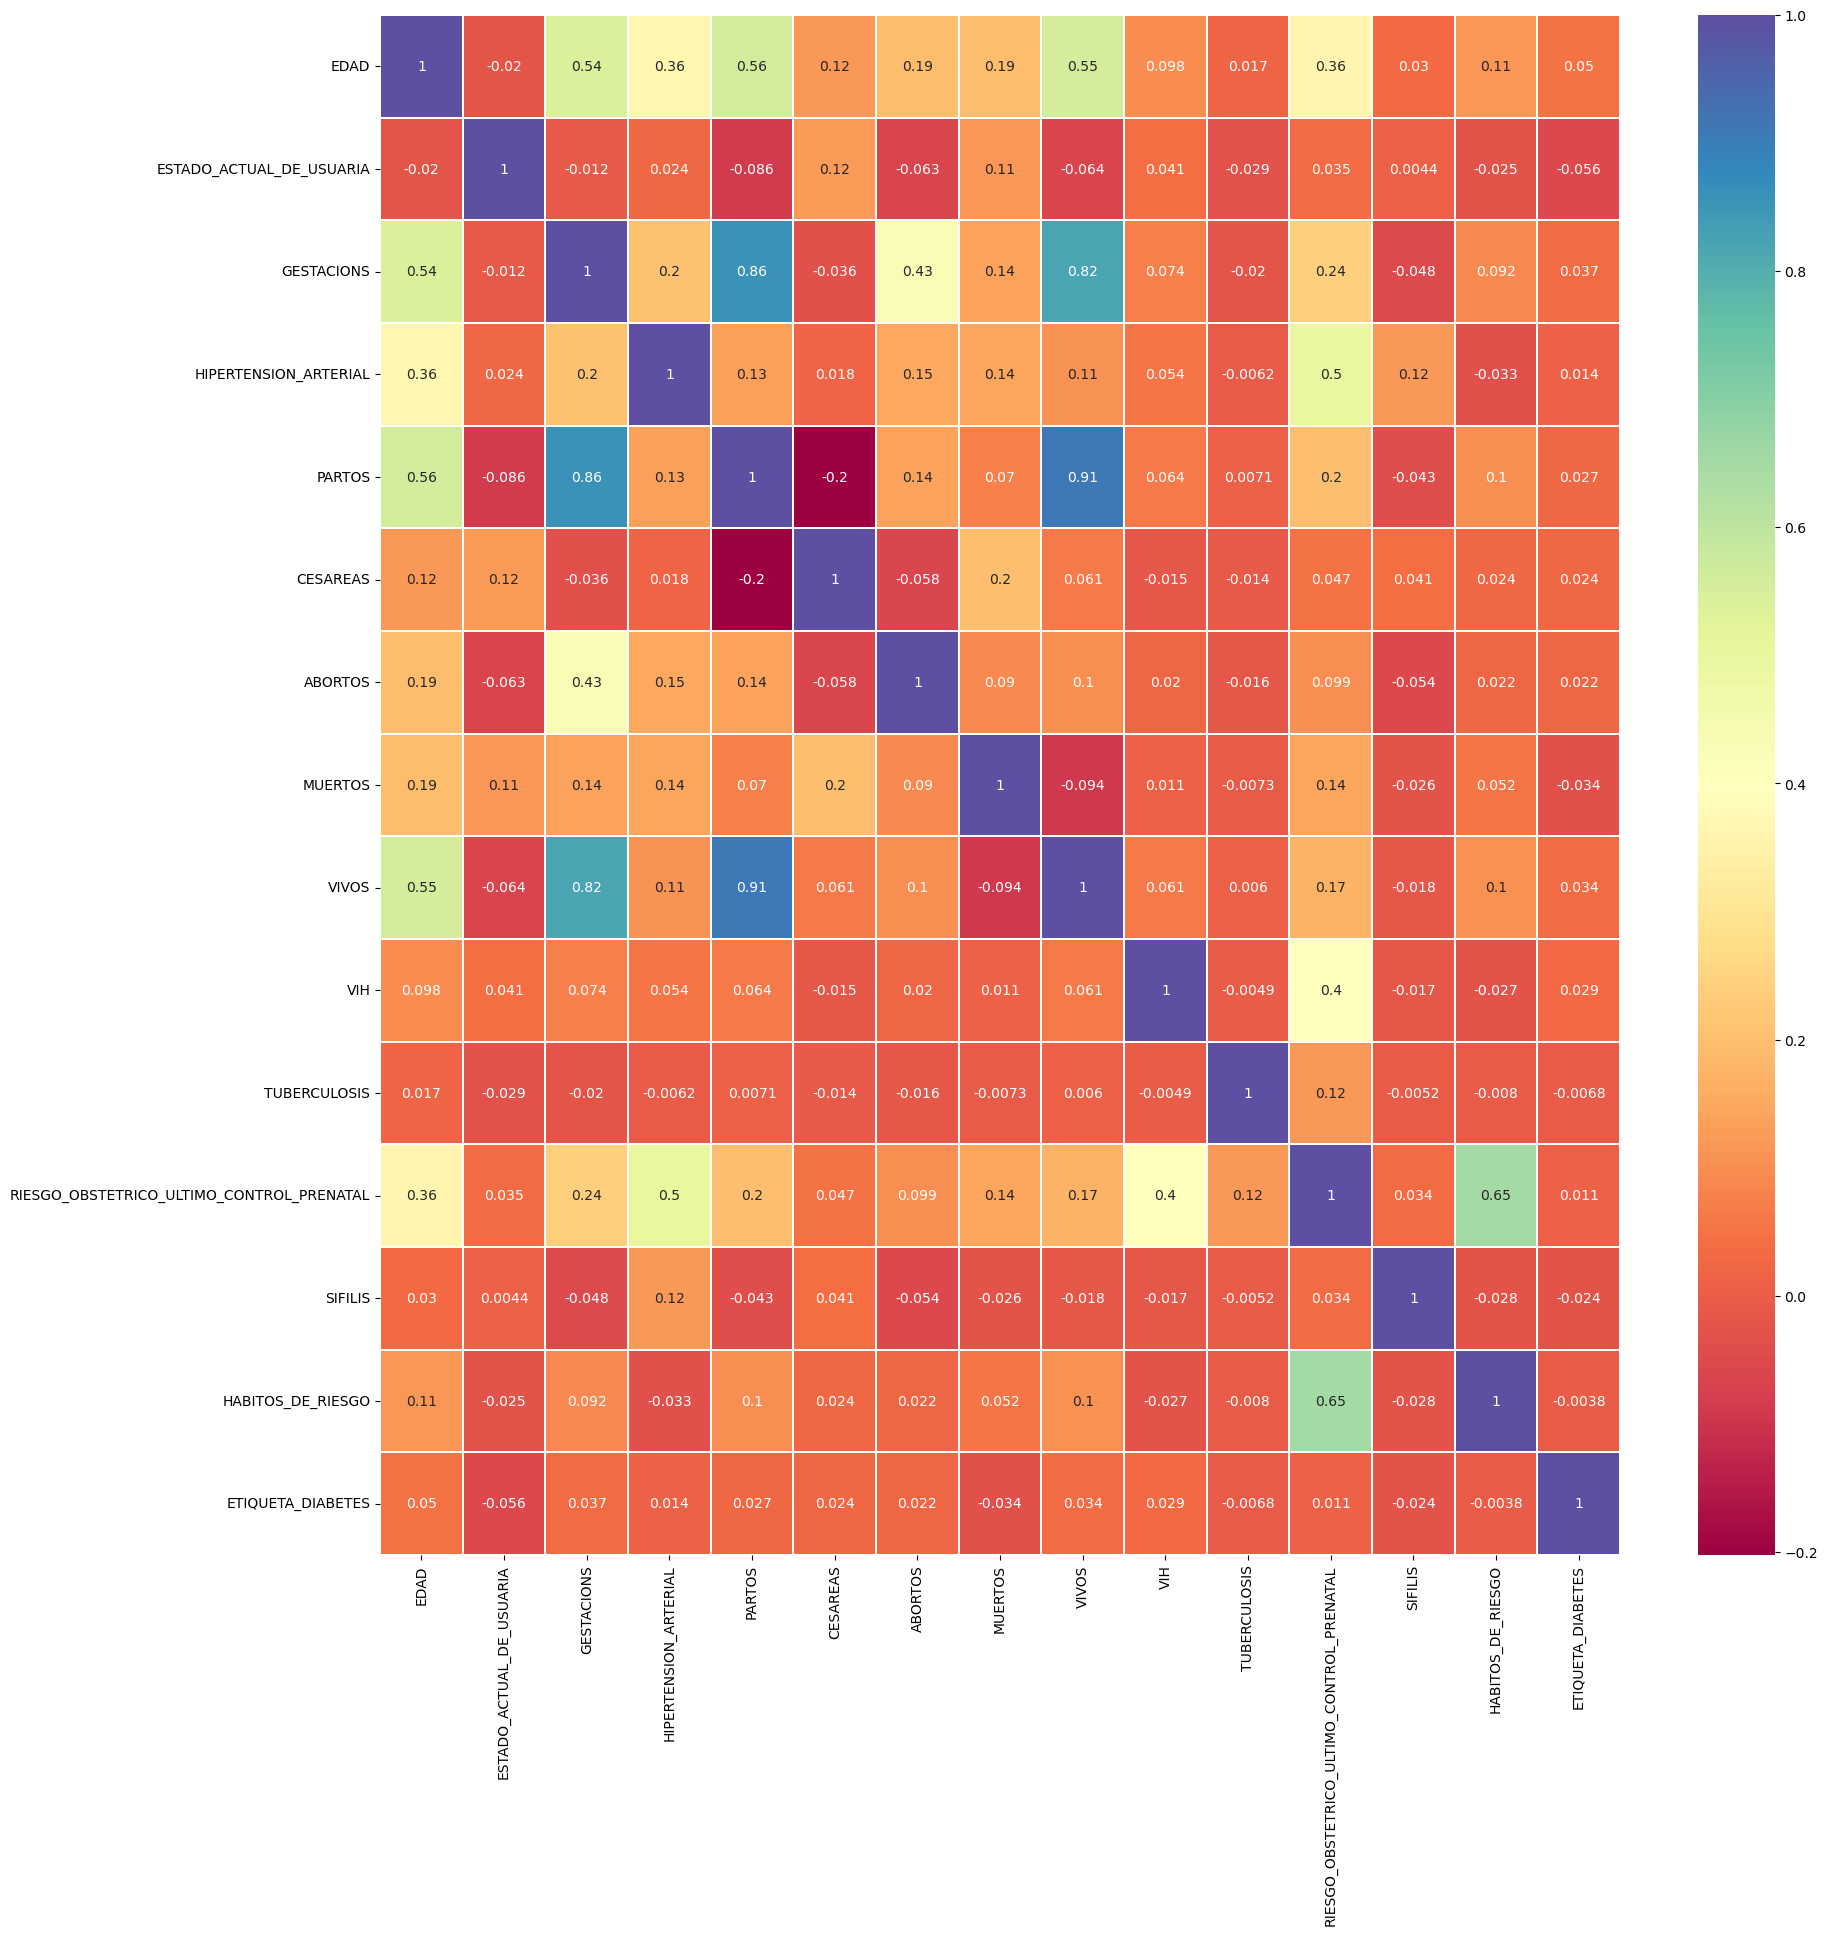

In [103]:
# Creando un mapa de calor de correlacion
sns.heatmap(ds.corr(),annot=True, cmap='Spectral', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

In [104]:
#Cambiar los DTypes de el dataset a int64
ds = ds.astype('int64')

In [105]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 678 entries, 0 to 679
Data columns (total 15 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   EDAD                                       678 non-null    int64
 1   ESTADO_ACTUAL_DE_USUARIA                   678 non-null    int64
 2   GESTACIONS                                 678 non-null    int64
 3   HIPERTENSION_ARTERIAL                      678 non-null    int64
 4   PARTOS                                     678 non-null    int64
 5   CESAREAS                                   678 non-null    int64
 6   ABORTOS                                    678 non-null    int64
 7   MUERTOS                                    678 non-null    int64
 8   VIVOS                                      678 non-null    int64
 9   VIH                                        678 non-null    int64
 10  TUBERCULOSIS                               678 non

In [106]:
ds.head()

,EDAD,ESTADO_ACTUAL_DE_USUARIA,GESTACIONS,HIPERTENSION_ARTERIAL,PARTOS,CESAREAS,ABORTOS,MUERTOS,VIVOS,VIH,TUBERCULOSIS,RIESGO_OBSTETRICO_ULTIMO_CONTROL_PRENATAL,SIFILIS,HABITOS_DE_RIESGO,ETIQUETA_DIABETES
0,34,1,1,1,0,0,0,0,0,0,0,1,0,0,0
1,27,0,2,0,2,0,0,0,0,0,0,1,0,0,0
2,26,1,2,0,0,2,0,0,2,0,0,0,0,0,0
3,22,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,27,0,1,0,0,0,0,0,0,0,0,0,0,0,0


# 

# Guardamos los datos en en un CSV llamado "ds1"

# 

In [107]:
# Guardamos los datos en en un CSV llamado "ds1"
ds.to_csv('ds1.csv', index=False)

In [108]:
#Cargamos el dataset en ds1
ds1 = pd.read_csv('ds1.csv')

# 

# Analisis de facores influyentes en el riesgo prenatal(variables independientes)

# 

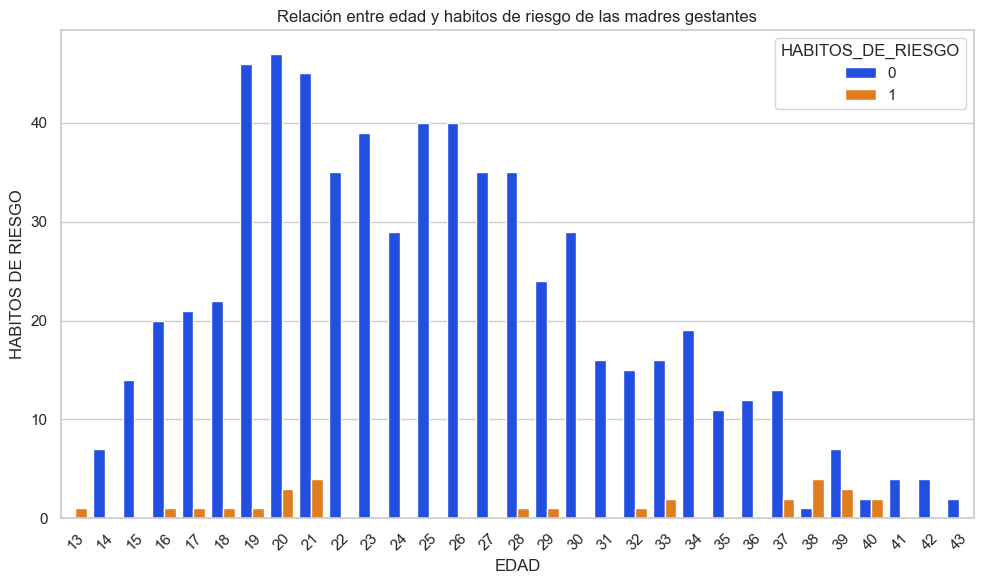

In [109]:
# Crear un DataFrame con las columnas relevantes
data = ds1[['EDAD', 'HABITOS_DE_RIESGO']]

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.set_palette("bright")

p = sns.countplot(x='EDAD', hue='HABITOS_DE_RIESGO', data=data)

plt.xlabel('EDAD')
plt.ylabel('HABITOS DE RIESGO')
plt.title('Relación entre edad y habitos de riesgo de las madres gestantes')

# Rotar etiquetas del eje x para mayor claridad
_ = plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 

# Escalado estándar del conjunto de datos

# 

In [110]:
ds1.columns

Index(['EDAD', 'ESTADO_ACTUAL_DE_USUARIA', 'GESTACIONS',
       'HIPERTENSION_ARTERIAL', 'PARTOS', 'CESAREAS', 'ABORTOS', 'MUERTOS',
       'VIVOS', 'VIH', 'TUBERCULOSIS',
       'RIESGO_OBSTETRICO_ULTIMO_CONTROL_PRENATAL', 'SIFILIS',
       'HABITOS_DE_RIESGO', 'ETIQUETA_DIABETES'],
      dtype='object')

In [111]:
# from sklearn.preprocessing import StandardScaler

ds1_scaled = pd.DataFrame()

# Seleccionar columnas a escalar
numeric_columns = ['EDAD', 'ESTADO_ACTUAL_DE_USUARIA', 'GESTACIONS',
       'HIPERTENSION_ARTERIAL', 'PARTOS', 'CESAREAS', 'ABORTOS', 'MUERTOS',
       'VIVOS', 'VIH', 'TUBERCULOSIS',
       'RIESGO_OBSTETRICO_ULTIMO_CONTROL_PRENATAL', 'SIFILIS',
       'HABITOS_DE_RIESGO', 'ETIQUETA_DIABETES']

# Aplicar StandardScaler
scaler = StandardScaler()
ds1_scaled[numeric_columns] = scaler.fit_transform(ds1[numeric_columns])

# El DataFrame 'data' ahora contiene las variables escaladas en las columnas especificadas.
print(ds1_scaled)

         EDAD  ESTADO_ACTUAL_DE_USUARIA  GESTACIONS  HIPERTENSION_ARTERIAL  \
0    1.373205                  0.425729   -0.507411               6.235572   
1    0.278975                 -0.752411    0.409988              -0.160370   
2    0.122657                  0.425729    0.409988              -0.160370   
3   -0.502617                  0.425729   -0.507411              -0.160370   
4    0.278975                 -0.752411   -0.507411              -0.160370   
..        ...                       ...         ...                    ...   
673 -0.971572                  0.425729   -0.507411              -0.160370   
674  0.278975                 -0.752411    1.327387              -0.160370   
675  2.780071                  0.425729    1.327387               6.235572   
676  0.435294                  0.425729    1.327387              -0.160370   
677 -1.440528                  0.425729   -0.507411              -0.160370   

       PARTOS  CESAREAS   ABORTOS   MUERTOS     VIVOS      VIH 

In [112]:
ds1_scaled.head()

,EDAD,ESTADO_ACTUAL_DE_USUARIA,GESTACIONS,HIPERTENSION_ARTERIAL,PARTOS,CESAREAS,ABORTOS,MUERTOS,VIVOS,VIH,TUBERCULOSIS,RIESGO_OBSTETRICO_ULTIMO_CONTROL_PRENATAL,SIFILIS,HABITOS_DE_RIESGO,ETIQUETA_DIABETES
0,1.373205,0.425729,-0.507411,6.235572,-0.674871,-0.365367,-0.404932,-0.190893,-0.721349,-0.12842,-0.038433,3.124405,-0.134231,-0.20755,-0.178029
1,0.278975,-0.752411,0.409988,-0.160370,1.042062,-0.365367,-0.404932,-0.190893,-0.721349,-0.12842,-0.038433,3.124405,-0.134231,-0.20755,-0.178029
2,0.122657,0.425729,0.409988,-0.160370,-0.674871,5.019827,-0.404932,-0.190893,1.034754,-0.12842,-0.038433,-0.320061,-0.134231,-0.20755,-0.178029
3,-0.502617,0.425729,-0.507411,-0.160370,-0.674871,-0.365367,-0.404932,-0.190893,-0.721349,-0.12842,-0.038433,-0.320061,-0.134231,-0.20755,-0.178029
4,0.278975,-0.752411,-0.507411,-0.160370,-0.674871,-0.365367,-0.404932,-0.190893,-0.721349,-0.12842,-0.038433,-0.320061,-0.134231,-0.20755,-0.178029


# 

# Machine learning no supervisado

# 

## Codo de puntuación de distorsión para agrupación de kmeans

# 
Este código utiliza la técnica conocida como "Elbow Method" (Método del Codo) para ayudar a determinar el número óptimo de clústeres en un conjunto de datos utilizando el algoritmo de k-means.

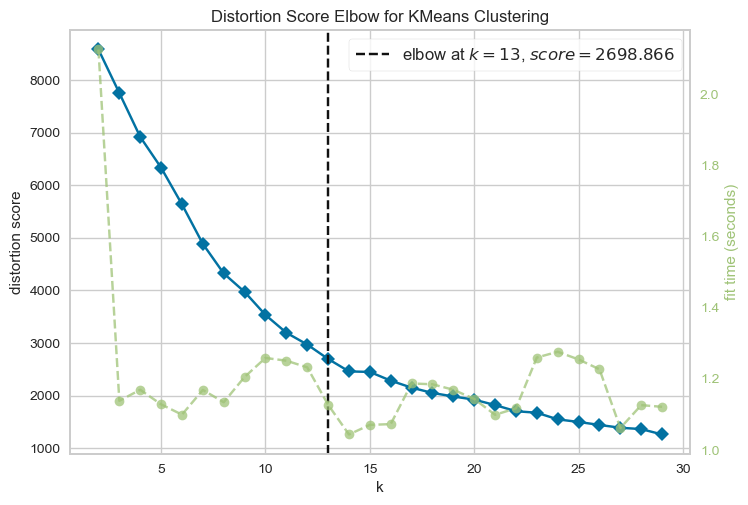

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [113]:
# Elbow Method for K means
from sklearn.cluster import KMeans
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state =10)
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(ds1_scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

# 

# Codo de puntuación de silueta para agrupación de kmeans

Este código utiliza la métrica de Silueta para evaluar el número óptimo de clústeres en un conjunto de datos utilizando el algoritmo de k-means.

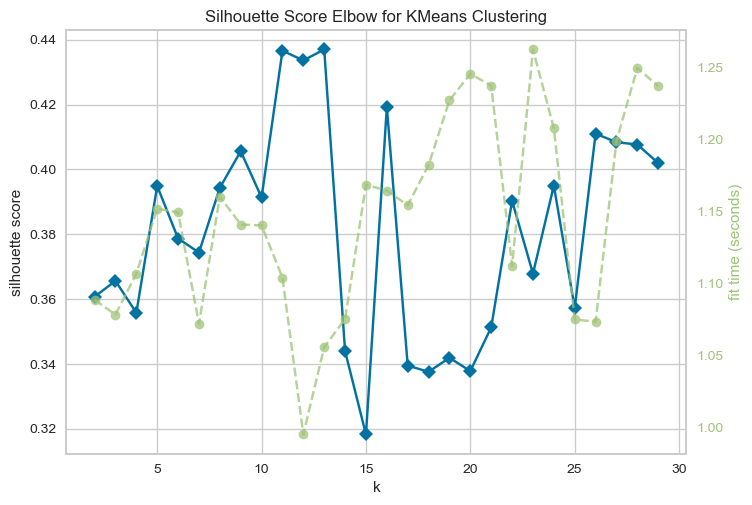

Optimal number of clusters based on silhouette score: [13]


In [114]:
# Silhouette Score for K means

# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state =10)
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings= True, locate_elbow=False)
visualizer.fit(ds1_scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

df3 = pd.DataFrame(visualizer.k_values_,columns=['centers'])
df3['scores'] = visualizer.k_scores_
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of clusters based on silhouette score:', df4['centers'].tolist())

# 

# Calinski Harabasz marca un codazo por la agrupación de kmeans

Utilizamos la métrica de Calinski-Harabasz para evaluar el número óptimo de clústeres en un conjunto de datos mediante el algoritmo de k-means.

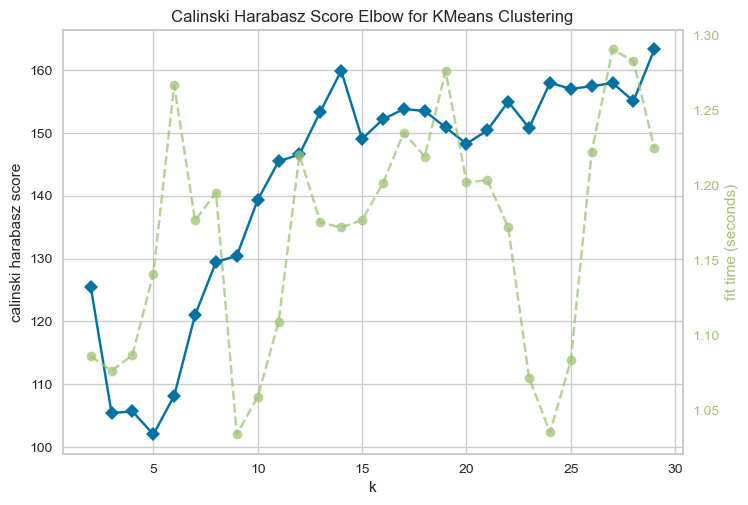

Optimal number of clusters based on calinski harabasz: [29]


In [115]:
# Calinski Harabasz Score for K means

# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state =10)
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='calinski_harabasz', timings= True, locate_elbow=False)
visualizer.fit(ds1_scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


df3 = pd.DataFrame(visualizer.k_values_,columns=['centers'])
df3['scores'] = visualizer.k_scores_
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of clusters based on calinski harabasz:', df4['centers'].tolist())

# 

# Métricas de validación de clúster

Este código implementa el algoritmo de k-means en un conjunto de datos y luego calcula algunas métricas de validación de clústeres para evaluar la calidad de la agrupación resultante.

In [116]:
# K means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
# Fit K-Means
kmeans_1 = KMeans(n_clusters=4, random_state= 10)
# Use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(ds1_scaled)
# Calculate cluster validation metrics
score_kemans_s = silhouette_score(ds1_scaled, kmeans_1.labels_, metric='euclidean')
score_kemans_c = calinski_harabasz_score(ds1_scaled, kmeans_1.labels_)
score_kemans_d = davies_bouldin_score(ds1_scaled, predictions)


print('Silhouette Score: %.4f' % score_kemans_s)
print('Calinski Harabasz Score: %.4f' % score_kemans_c)
print('Davies Bouldin Score: %.4f' % score_kemans_d)

Silhouette Score: 0.3558
Calinski Harabasz Score: 105.6609
Davies Bouldin Score: 1.2028


Moderada a buena calidad de separacion entre los clusteres
##### Silhouette Score (Puntaje de Silueta):

Valor entre -1 y 1.

Cuanto más cercano a 1, mejor. Indica una buena separación entre clústeres.

Cuanto más cercano a -1, peor. Indica que las muestras pueden haber sido asignadas al clúster incorrecto.

Un Silhouette Score de 0.3558 sugiere que hay una separación significativa entre los clústeres.

##### Calinski Harabasz Score:

Cuanto mayor sea el puntaje, mejor.

Indica una mejor cohesión entre clústeres y una mayor separación entre ellos.

Se compara con otros valores posibles de k para determinar el número óptimo de clústeres.

Un Calinski Harabasz Score de 105.6609 sugiere que la separación entre clústeres es relativamente buena.

##### Davies Bouldin Score:

Cuanto menor sea el puntaje, mejor.

Indica una mejor separación y cohesión entre clústeres.

Un valor cercano a cero indica una buena partición.

Un Davies Bouldin Score de 1.2028 sugiere que hay una buena separación y cohesión entre los clústeres.

# 

# Gráfico de coeficientes de silueta para evaluar la calidad de los clústeres obtenidos mediante el algoritmo KMeans

# 

Coeficiente de silueta promedio: 0.36873338763644536


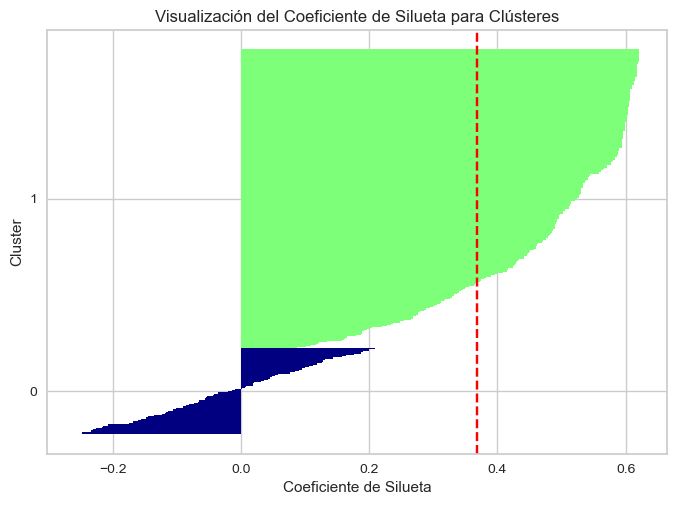

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Supongamos que ya tienes ds1_scaled con los datos escalados

# Inicializar el número de clústeres que deseas probar
n_clusters = 2

# Crear y ajustar el modelo KMeans
km = KMeans(n_clusters=n_clusters, init='k-means++', n_init=100, max_iter=200, tol=1e-04, random_state=42)
y_km = km.fit_predict(ds1_scaled)

# Calcular el coeficiente de silueta
silhouette_vals = silhouette_samples(ds1_scaled, y_km, metric='euclidean')

# Calcular el promedio del coeficiente de silueta
silhouette_avg = silhouette_score(ds1_scaled, y_km, metric='euclidean')
print("Coeficiente de silueta promedio:", silhouette_avg)

# Crear un gráfico de barras para visualizar el coeficiente de silueta de cada punto
fig, ax = plt.subplots()
y_ticks = []
y_lower, y_upper = 0, 0

for i, c in enumerate(np.unique(y_km)):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_upper += len(c_silhouette_vals)
    color = plt.cm.jet(float(i) / n_clusters)
    ax.barh(range(y_lower, y_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    y_ticks.append((y_lower + y_upper) / 2.)
    y_lower += len(c_silhouette_vals)

# Línea vertical para el coeficiente de silueta promedio
ax.axvline(x=silhouette_avg, color="red", linestyle="--")

# Etiquetas, título y ajustes
ax.set_yticks(y_ticks)
ax.set_yticklabels(np.unique(y_km))
ax.set_ylabel('Cluster')
ax.set_xlabel('Coeficiente de Silueta')

plt.title('Visualización del Coeficiente de Silueta para Clústeres')
plt.show()


# 

# Metodo del codo

# 

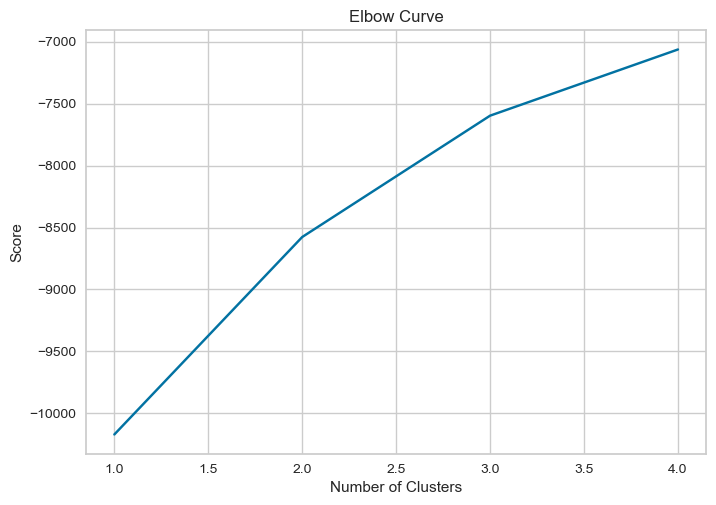

In [118]:
from sklearn.cluster import KMeans
Nc = range(1, 5)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(ds1_scaled).score(ds1_scaled) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

# 

# Distorsion

# 

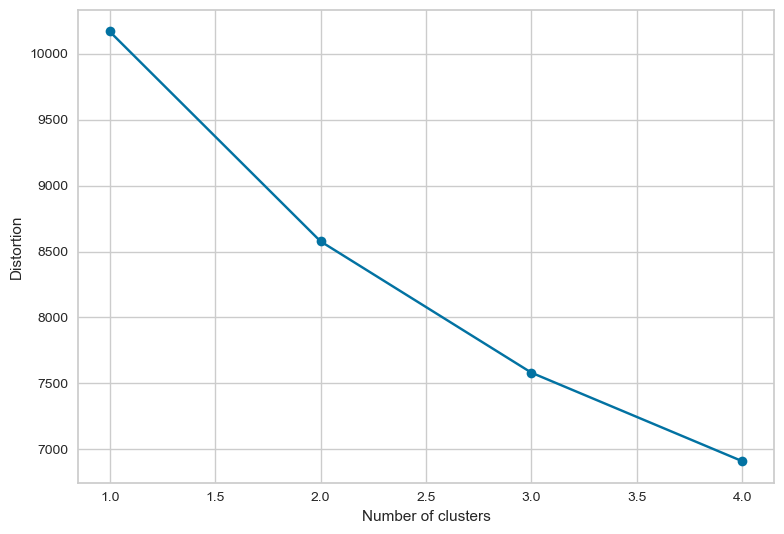

In [119]:
distortions = []
for i in range(1, 5):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(ds1_scaled)
    distortions.append(km.inertia_)
plt.plot(range(1, 5), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
#plt.savefig('images/11_03.png', dpi=300)
plt.show()

# 

# Random Forest


El algoritmo Random Forest es una técnica de aprendizaje supervisado que combina múltiples modelos de árboles de decisión para mejorar la precisión y la generalización del modelo.

# 

In [120]:
# Suponiendo que las variables categóricas codificadas están en 'CATEGORICA1' y 'CATEGORICA2' 
columnas_seleccionadas = ['HIPERTENSION_ARTERIAL', 'VIH', 'TUBERCULOSIS', 'SIFILIS', 'HABITOS_DE_RIESGO', 'EDAD', 'ESTADO_ACTUAL_DE_USUARIA', 'GESTACIONS', 'PARTOS', 'CESAREAS', 'ABORTOS', 'MUERTOS', 'VIVOS', 'ETIQUETA_DIABETES'] 


X_df = ds1[columnas_seleccionadas]

y_df = ds1['RIESGO_OBSTETRICO_ULTIMO_CONTROL_PRENATAL']

In [121]:
#Suponiendo que X_df e y_df son tu matriz de características y variable objetivo
from sklearn.ensemble import RandomForestClassifier

#Crear el clasificador de Bosques Aleatorios
clf_rnd = RandomForestClassifier()

#Entrenar el clasificador (reemplaza X_df e y_df con tus datos reales)
clf_rnd.fit(X_df, y_df)  # <-- Proporciona tanto X_df (características) como y_df (objetivo)

#Ahora puedes acceder a las importancias de las características
feature_importances = {name: score for name, score in zip(list(X_df), clf_rnd.feature_importances_)}
feature_importances_sorted = pd.Series(feature_importances).sort_values(ascending=False)

In [122]:
clf_rnd

RandomForestClassifier()

In [123]:
feature_importances_sorted

HABITOS_DE_RIESGO           0.347006
EDAD                        0.260348
HIPERTENSION_ARTERIAL       0.135873
VIH                         0.110897
VIVOS                       0.029950
GESTACIONS                  0.027036
PARTOS                      0.024630
ESTADO_ACTUAL_DE_USUARIA    0.014874
ABORTOS                     0.014424
TUBERCULOSIS                0.013903
MUERTOS                     0.011554
CESAREAS                    0.006030
SIFILIS                     0.002120
ETIQUETA_DIABETES           0.001354
dtype: float64

<Axes: >

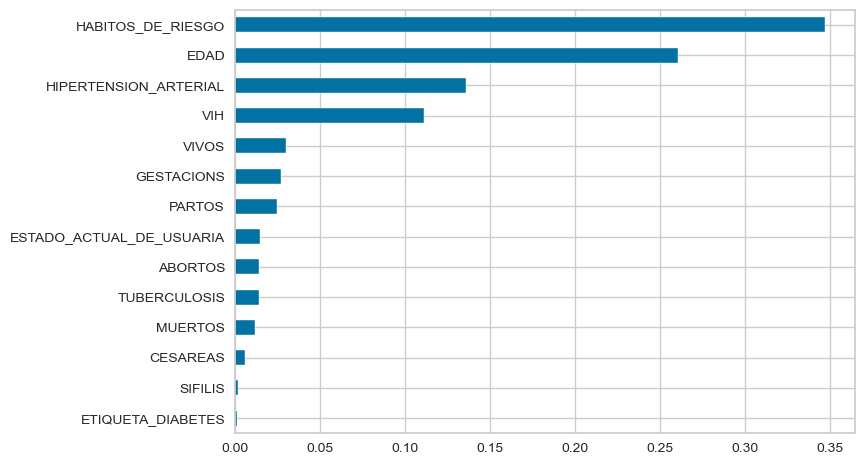

In [124]:
from matplotlib import pyplot as plt
for_plot = pd.DataFrame({'x_axis':X_df.columns, 'y_axis':feature_importances_sorted}).sort_values(by='y_axis',ascending=True)
for_plot['y_axis'].plot.barh()

# 

# Análisis de Componentes Principales (PCA)

El Análisis de Componentes Principales (PCA, por sus siglas en inglés) es una técnica de reducción de dimensionalidad que se utiliza en estadísticas y aprendizaje automático. Su objetivo principal es transformar un conjunto de datos original, que puede tener muchas variables correlacionadas, en un conjunto de datos nuevo con menos variables no correlacionadas llamadas "componentes principales". 

# 

In [125]:
#Selección de características en un conjunto de datos utilizando la importancia de las características.
X_reduced = X_df[list(feature_importances_sorted.head(14).index)].copy()
X_reduced

,HABITOS_DE_RIESGO,EDAD,HIPERTENSION_ARTERIAL,VIH,VIVOS,GESTACIONS,PARTOS,ESTADO_ACTUAL_DE_USUARIA,ABORTOS,TUBERCULOSIS,MUERTOS,CESAREAS,SIFILIS,ETIQUETA_DIABETES
0,0,34,1,0,0,1,0,1,0,0,0,0,0,0
1,0,27,0,0,0,2,2,0,0,0,0,0,0,0
2,0,26,0,0,2,2,0,1,0,0,0,2,0,0
3,0,22,0,0,0,1,0,1,0,0,0,0,0,0
4,0,27,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,0,19,0,0,0,1,0,1,0,0,0,0,0,0
674,0,27,0,0,2,3,2,0,1,0,0,0,0,0
675,0,43,1,0,1,3,1,1,1,0,0,0,0,0
676,0,28,0,0,3,3,3,1,0,0,0,0,0,0


In [163]:
from sklearn.metrics import silhouette_score, pairwise_distances
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reduced)

distances = pairwise_distances(X_scaled)

silhouette_avg = silhouette_score(distances, labels)

print("Silueta promedio (DBSCAN):", silhouette_avg)

Silueta promedio (DBSCAN): 0.027780352332724616


In [164]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_reduced, labels)
print("Silueta promedio:", silhouette_avg)

Silueta promedio: -0.061704900352071386


In [126]:
# PCA

from sklearn.decomposition import PCA

for comp in range(4, X_reduced.shape[1]):
    modelo_pca = PCA(n_components= comp)
    modelo_pca.fit(X_reduced)
    comp_check = modelo_pca.explained_variance_ratio_
    final_comp = comp
    if comp_check.sum() > 0.85:
        break

Final_PCA = PCA(n_components= final_comp)
Final_PCA.fit(X_reduced)
cluster_df=Final_PCA.transform(X_reduced)


num_comps = comp_check.shape[0]
print("Using {} components, we can explain {}% of the variability in the original data.".format(final_comp,comp_check.sum()))

Using 4 components, we can explain 0.9877835985274799% of the variability in the original data.


En este caso, al reducir la dimensionalidad a 4 componentes principales, todavía se mantiene una proporción muy alta de la información original. 

Esto sugiere que estos 4 componentes principales contienen la mayor parte de la variabilidad esencial en los datos originales y pueden ser considerados representativos del conjunto de datos.

# 

# Regresion logistica

Realizamos un análisis de regresión logística en el conjunto de datos, entrenamos el modelo, realizamos predicciones en el conjunto de prueba y evalúamos el rendimiento del modelo mediante métricas de clasificación. 

# 

In [127]:
# Importar las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Supongamos que tienes un conjunto de datos de entrada (X) y las etiquetas correspondientes (y)
# Aquí se generan datos de ejemplo para ilustrar el código
np.random.seed(42)
columnas_a_usar = ['HIPERTENSION_ARTERIAL', 'VIH', 'TUBERCULOSIS', 'SIFILIS', 'HABITOS_DE_RIESGO', 'EDAD', 'ESTADO_ACTUAL_DE_USUARIA', 'GESTACIONS', 'PARTOS', 'CESAREAS', 'ABORTOS', 'MUERTOS', 'VIVOS', 'ETIQUETA_DIABETES']
X = ds1[columnas_a_usar]
y = ds1['RIESGO_OBSTETRICO_ULTIMO_CONTROL_PRENATAL']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de regresión logística
model = LogisticRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo: {:.2f}%".format(accuracy * 100))


# Mostrar el informe de clasificación
class_report = classification_report(y_test, y_pred)
print("Informe de Clasificación:")
print(class_report)


Precisión del modelo: 98.53%
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       118
           1       1.00      0.89      0.94        18

    accuracy                           0.99       136
   macro avg       0.99      0.94      0.97       136
weighted avg       0.99      0.99      0.98       136



#### Precisión del modelo 
El modelo tiene una precisión del 98.53%, lo que indica que el 98.53% de las predicciones realizadas son correctas.

In [128]:
# Suponiendo que tienes un conjunto de nuevas características manualmente ingresadas para cada conjunto ()
nuevos_datos_rop = [[0,0,0,1,0,0,0,0,0,0,0,0,0,0]]

# realiza la predicción utilizando el modelo de regresión logística entrenado (model) en los nuevos datos.
y_rop_nuevos_pred = model.predict(nuevos_datos_rop)


# Imprimir las predicciones
print("Rendimiento para Riesgo:", y_rop_nuevos_pred)


Rendimiento para Riesgo: [0]


# 

# CLASIFICACION DEL KNN

Creamos un modelo de clasificación basado en el algoritmo de vecinos más cercanos (K-Nearest Neighbors, KNN)

# 

In [129]:
columnas_seleccionadas = ['HIPERTENSION_ARTERIAL', 'VIH', 'TUBERCULOSIS', 'SIFILIS', 'HABITOS_DE_RIESGO', 'EDAD', 'ESTADO_ACTUAL_DE_USUARIA', 'GESTACIONS', 'PARTOS', 'CESAREAS', 'ABORTOS', 'MUERTOS', 'VIVOS', 'ETIQUETA_DIABETES'] 


X_df = ds1[columnas_seleccionadas]

y_df = ds1['RIESGO_OBSTETRICO_ULTIMO_CONTROL_PRENATAL']

In [130]:
# from sklearn.model_selection import train_test_split

#dividimos el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_df,y_df, random_state=0)

In [131]:
#Imprimimos las formas (número de filas y columnas) del conjuntos de entrenamiento y prueba
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(508, 14)
(170, 14)
(508,)
(170,)


### Para la matriz de confusion

Definimos una función llamada mostrar_resultados que toma los dos conjuntos de etiquetas como entrada (y_test y pred_y) y muestra la matriz de confusión y el informe de clasificación.

In [132]:
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(8, 8))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))

In [133]:
from sklearn.preprocessing import StandardScaler

#realizamos la estandarización de las características con standard scaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [134]:
X_train


array([[-0.16205748, -0.11820345, -0.04441156, ..., -0.18149441,
        -0.72110608, -0.18643815],
       [-0.16205748, -0.11820345, -0.04441156, ..., -0.18149441,
        -0.72110608, -0.18643815],
       [-0.16205748, -0.11820345, -0.04441156, ..., -0.18149441,
        -0.72110608, -0.18643815],
       ...,
       [-0.16205748, -0.11820345, -0.04441156, ..., -0.18149441,
         1.77654317, -0.18643815],
       [-0.16205748,  8.45998987, -0.04441156, ...,  3.23328924,
        -0.72110608, -0.18643815],
       [-0.16205748, -0.11820345, -0.04441156, ..., -0.18149441,
        -0.72110608, -0.18643815]])

In [135]:
X_test

array([[-0.16205748, -0.11820345, -0.04441156, ..., -0.18149441,
        -0.72110608, -0.18643815],
       [-0.16205748, -0.11820345, -0.04441156, ..., -0.18149441,
        -0.72110608, -0.18643815],
       [-0.16205748, -0.11820345, -0.04441156, ..., -0.18149441,
         1.77654317, -0.18643815],
       ...,
       [-0.16205748, -0.11820345, -0.04441156, ..., -0.18149441,
         0.11144367, -0.18643815],
       [-0.16205748, -0.11820345, -0.04441156, ..., -0.18149441,
         1.77654317, -0.18643815],
       [-0.16205748, -0.11820345, -0.04441156, ..., -0.18149441,
         0.94399342, -0.18643815]])

In [136]:
y_test

279    0
144    0
441    0
390    0
589    0
      ..
92     0
436    1
66     1
456    0
293    0
Name: RIESGO_OBSTETRICO_ULTIMO_CONTROL_PRENATAL, Length: 170, dtype: int64

In [137]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

#crea un clasificador k-NN con 5 vecinos y utiliza la distancia euclidiana para medir la similitud entre puntos.

model = KNeighborsClassifier(n_neighbors=5, metric = 'euclidean')

In [138]:
#entrenamos el modelo de clasificación en los datos de entrenamiento.

model.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [139]:
#realizamos predicciones en el conjunto de datos de prueba (X_test) utilizando el modelo previamente entrenado (model). 
y_pred = model.predict(X_test)
#y_pred contendrá las predicciones del modelo para las observaciones en el conjunto de datos de prueba
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

# 

# PUNTUACION DE PRECISION Y MATRIZ DE CONFUSION

# 

In [140]:
#utilizamos la funcion accuracy_score para calcular la precisión del modelo
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)*100

97.05882352941177

In [141]:
#utilizamos la funcion confusion_matrix para generar y visualizar la matriz de confusión. 
import seaborn as sns
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


array([[152,   0],
       [  5,  13]], dtype=int64)

#

                      Matriz 
[Verdaderos Negativos (TN)] - [Falsos Negativos (FN)]
​
  
[Falsos Positivos (FP)] - [Verdaderos Positivos (TP)]
​

#

#### Verdaderos Negativos (TN): 
152 instancias que fueron correctamente clasificadas como negativas.

#### Falsos Positivos (FP): 
0 instancias que fueron incorrectamente clasificadas como positivas.

#### Falsos Negativos (FN): 
5 instancias que fueron incorrectamente clasificadas como negativas.

#### Verdaderos Positivos (TP): 
13 instancias que fueron correctamente clasificadas como positivas.


# 

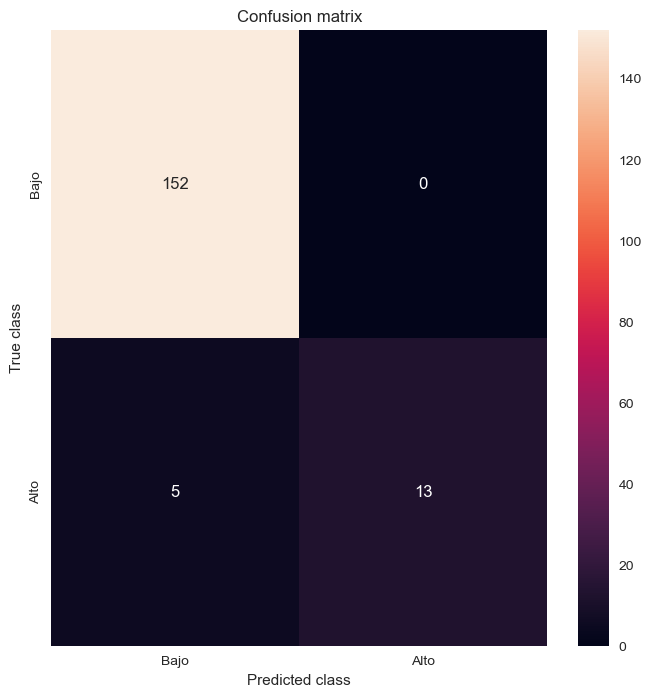

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       152
           1       1.00      0.72      0.84        18

    accuracy                           0.97       170
   macro avg       0.98      0.86      0.91       170
weighted avg       0.97      0.97      0.97       170



In [142]:
#Sirve para visualizar la matriz de confusion
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

In [143]:
ds1.head()

,EDAD,ESTADO_ACTUAL_DE_USUARIA,GESTACIONS,HIPERTENSION_ARTERIAL,PARTOS,CESAREAS,ABORTOS,MUERTOS,VIVOS,VIH,TUBERCULOSIS,RIESGO_OBSTETRICO_ULTIMO_CONTROL_PRENATAL,SIFILIS,HABITOS_DE_RIESGO,ETIQUETA_DIABETES
0,34,1,1,1,0,0,0,0,0,0,0,1,0,0,0
1,27,0,2,0,2,0,0,0,0,0,0,1,0,0,0
2,26,1,2,0,0,2,0,0,2,0,0,0,0,0,0
3,22,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,27,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [144]:
#Utilizamos el modelo KNN para predecir la clase a la que pertenecería un nuevo conjunto de características.

y_pred = model.predict([[-0.16205748, -0.11820345, -0.04441156, 1.373205,  4.81564909,  0.57337682,
   0.3753068,  -0.51293741, -0.66326834,  2.26808802, -0.40223347,  3.23328924,
   0.11144367, -0.18643815]])
y_pred

array([1], dtype=int64)

# 

# PREDICION STREAMLIT

SVM es un conjunto de algoritmos de aprendizaje supervisado utilizados para clasificación y regresión.

Clasificación: SVM se utiliza para problemas de clasificación donde se busca separar datos en dos o más categorías.

# 

In [145]:
categorical_columns = ['HIPERTENSION_ARTERIAL', 'VIH', 'TUBERCULOSIS', 'SIFILIS', 'HABITOS_DE_RIESGO', 'RIESGO_OBSTETRICO_ULTIMO_CONTROL_PRENATAL']
numeric_columns_pca = ['EDAD', 'ESTADO_ACTUAL_DE_USUARIA', 'GESTACIONS', 'PARTOS', 'CESAREAS', 'ABORTOS', 'MUERTOS', 'VIVOS', 'ETIQUETA_DIABETES']

ds_pred = pd.concat([ds1_scaled[numeric_columns_pca], ds1[categorical_columns]], axis=1)

In [146]:
# Guardamos los datos en en un CSV llamado "ds1"
ds_pred.to_csv('ds_pred.csv', index=False)

In [147]:
#Cargamos el dataset en ds1
ds1_pred = pd.read_csv('ds_pred.csv')

In [148]:
ds1_pred.head(20)

,EDAD,ESTADO_ACTUAL_DE_USUARIA,GESTACIONS,PARTOS,CESAREAS,ABORTOS,MUERTOS,VIVOS,ETIQUETA_DIABETES,HIPERTENSION_ARTERIAL,VIH,TUBERCULOSIS,SIFILIS,HABITOS_DE_RIESGO,RIESGO_OBSTETRICO_ULTIMO_CONTROL_PRENATAL
0,1.373205,0.425729,-0.507411,-0.674871,-0.365367,-0.404932,-0.190893,-0.721349,-0.178029,1,0,0,0,0,1
1,0.278975,-0.752411,0.409988,1.042062,-0.365367,-0.404932,-0.190893,-0.721349,-0.178029,0,0,0,0,0,1
2,0.122657,0.425729,0.409988,-0.674871,5.019827,-0.404932,-0.190893,1.034754,-0.178029,0,0,0,0,0,0
3,-0.502617,0.425729,-0.507411,-0.674871,-0.365367,-0.404932,-0.190893,-0.721349,-0.178029,0,0,0,0,0,0
4,0.278975,-0.752411,-0.507411,-0.674871,-0.365367,-0.404932,-0.190893,-0.721349,-0.178029,0,0,0,0,0,0
5,-1.909483,-0.752411,-0.507411,-0.674871,-0.365367,-0.404932,-0.190893,-0.721349,-0.178029,0,0,0,0,1,1
6,-0.658935,-0.752411,-0.507411,-0.674871,-0.365367,-0.404932,-0.190893,-0.721349,-0.178029,0,0,0,0,1,1
7,1.373205,-0.752411,1.327387,1.900528,-0.365367,-0.404932,-0.190893,1.912806,-0.178029,0,0,0,0,0,0
8,0.435294,-0.752411,1.327387,1.042062,-0.365367,1.643902,-0.190893,1.034754,-0.178029,0,0,0,0,0,0
9,-0.189980,-0.752411,0.409988,-0.674871,2.327230,1.643902,-0.190893,0.156702,-0.178029,0,0,0,0,0,0


In [149]:
# Obtenemos variables independientes
X = ds1_pred.drop(["RIESGO_OBSTETRICO_ULTIMO_CONTROL_PRENATAL"],axis = 1)
X.head()

,EDAD,ESTADO_ACTUAL_DE_USUARIA,GESTACIONS,PARTOS,CESAREAS,ABORTOS,MUERTOS,VIVOS,ETIQUETA_DIABETES,HIPERTENSION_ARTERIAL,VIH,TUBERCULOSIS,SIFILIS,HABITOS_DE_RIESGO
0,1.373205,0.425729,-0.507411,-0.674871,-0.365367,-0.404932,-0.190893,-0.721349,-0.178029,1,0,0,0,0
1,0.278975,-0.752411,0.409988,1.042062,-0.365367,-0.404932,-0.190893,-0.721349,-0.178029,0,0,0,0,0
2,0.122657,0.425729,0.409988,-0.674871,5.019827,-0.404932,-0.190893,1.034754,-0.178029,0,0,0,0,0
3,-0.502617,0.425729,-0.507411,-0.674871,-0.365367,-0.404932,-0.190893,-0.721349,-0.178029,0,0,0,0,0
4,0.278975,-0.752411,-0.507411,-0.674871,-0.365367,-0.404932,-0.190893,-0.721349,-0.178029,0,0,0,0,0


In [150]:
# Obtenemos variable dependiente
Y = ds1_pred.pop('RIESGO_OBSTETRICO_ULTIMO_CONTROL_PRENATAL')
Y

0      1
1      1
2      0
3      0
4      0
      ..
673    0
674    0
675    1
676    0
677    0
Name: RIESGO_OBSTETRICO_ULTIMO_CONTROL_PRENATAL, Length: 678, dtype: int64

In [151]:
# Separamos datos para ajuste y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)
     

# 

svm.SVC: 

Esta parte del código crea un clasificador SVM. SVC significa Support Vector Classification, que es específico para la clasificación con SVM.

kernel='linear': 

Especifica que se está utilizando un kernel lineal. Un kernel es una función que mide la similitud entre dos puntos en el espacio de características. El kernel lineal es adecuado para problemas donde los datos son linealmente separables.

In [152]:
# Creamos y entrenamos un modelo de Máquinas de Soporte Vectorial (SVM) para clasificación.
model = svm.SVC(kernel='linear', C=100).fit(X_train, y_train)

In [153]:

# Grabamos el modelo en el directorio
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

In [154]:


# Cargamos el modelo
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'rb') as file:
    model = pickle.load(file)

### Desempeño del modelo

In [155]:
# Encontramos el accuracy promedio usando datos de test
score = model.score(X_test, y_test)
print(score)

0.9926470588235294


### Probamos con una muestra nueva

In [156]:

x_in = np.asarray([1.373205, 0.425729,-0.507411,-0.674871, -0.365367,-0.404932,-0.190893, -0.721349,-0.178029, 1 , 0, 0, 0,0]).reshape(1,-1)
predicts = model.predict(x_in)
predicts[0]

1